In [274]:
import pandas as pd

data = pd.read_csv('data.csv', delimiter=';')
data = pd.DataFrame(data)

In [275]:
import pandas as pd

numero_columnas = len(data.columns)
print(f"El DataFrame tiene {numero_columnas} columnas.")
numero_filas = len(data)
print(f"El DataFrame tiene {numero_filas} filas.")

El DataFrame tiene 37 columnas.
El DataFrame tiene 4424 filas.


Veo si hay algun valor nulo en total:

In [276]:
import pandas as pd

hay_nulos = data.isnull().values.any()
print(hay_nulos)

False


Codifico la columna Blanco/Situación:

In [277]:
data['Blanco/situacion'] = data['Blanco/situacion'].replace({
    'Dropout': 1,
    'Enrolled': 2,
    'Graduate': 3
})

C:\Users\User\AppData\Local\Temp\ipykernel_20236\2851515680.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Blanco/situacion'] = data['Blanco/situacion'].replace({


In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Estado Civil                                      4424 non-null   int64  
 1   Modo de aplicación                                4424 non-null   int64  
 2   Orden de aplicación                               4424 non-null   int64  
 3   Curso                                             4424 non-null   int64  
 4   Asistencia diurna/nocturna                        4424 non-null   int64  
 5   Titulación previa                                 4424 non-null   int64  
 6   Titulación previa (grado)                         4424 non-null   float64
 7   Nacionalidad                                      4424 non-null   int64  
 8   Titulación de la madre                            4424 non-null   int64  
 9   Titulacion del padr

Busco las variables object para tratarlos:

In [279]:
import pandas as pd

object_columns = data.select_dtypes(include=['object']).columns
print("Columnas de tipo 'object':")
print(object_columns)


Columnas de tipo 'object':
Index(['Unidades curriculares 1º sem (grado)', 'Unidades curriculares 2º sem (grado)'], dtype='object')


Trato las columnas 'object': Cambio las ',' por '.' en los números decimales como: 2678,90

In [280]:
# Reemplazar comas por puntos en la columna 'Unidades curriculares 1º sem (grado)' y en la columna 'Unidades curriculares 2º sem (grado)'
data['Unidades curriculares 1º sem (grado)'] = data['Unidades curriculares 1º sem (grado)'].str.replace(',', '.')
data['Unidades curriculares 2º sem (grado)'] = data['Unidades curriculares 2º sem (grado)'].str.replace(',', '.')
print(data['Unidades curriculares 1º sem (grado)'])
print(data['Unidades curriculares 2º sem (grado)'])

0                        0.0
1                       14.0
2                        0.0
3       13428571428571400.00
4       12333333333333300.00
                ...         
4419                    13.6
4420                    12.0
4421                  149125
4422                    13.8
4423    11666666666666600.00
Name: Unidades curriculares 1º sem (grado), Length: 4424, dtype: object
0               0.0
1       1.36667E+16
2               0.0
3              12.4
4              13.0
           ...     
4419    1.26667E+16
4420           11.0
4421           13.5
4422           12.0
4423           13.0
Name: Unidades curriculares 2º sem (grado), Length: 4424, dtype: object


Paso de object a float64 las variables: Unidades curriculares 2º sem (grado) y Unidades curriculares 2º sem (grado)

In [281]:
import pandas as pd

# Reemplazar las comas por puntos en los datos de las columnas
data['Unidades curriculares 1º sem (grado)'] = data['Unidades curriculares 1º sem (grado)'].str.replace(',', '.')
data['Unidades curriculares 2º sem (grado)'] = data['Unidades curriculares 2º sem (grado)'].str.replace(',', '.')

# Convertir los datos de las columnas a float
data['Unidades curriculares 1º sem (grado)'] = data['Unidades curriculares 1º sem (grado)'].astype(float)
data['Unidades curriculares 2º sem (grado)'] = data['Unidades curriculares 2º sem (grado)'].astype(float)

# Verificar la conversión
print(data['Unidades curriculares 1º sem (grado)'].head())
print(data['Unidades curriculares 1º sem (grado)'].dtype)
print(data['Unidades curriculares 2º sem (grado)'].head())
print(data['Unidades curriculares 2º sem (grado)'].dtype)

0    0.000000e+00
1    1.400000e+01
2    0.000000e+00
3    1.342857e+16
4    1.233333e+16
Name: Unidades curriculares 1º sem (grado), dtype: float64
float64
0    0.000000e+00
1    1.366670e+16
2    0.000000e+00
3    1.240000e+01
4    1.300000e+01
Name: Unidades curriculares 2º sem (grado), dtype: float64
float64


Para ver que al haber cambiado de object a float no ha dañado los datos, comparo con el excel original las sumas finales:

In [282]:
import pandas as pd

suma = data['Unidades curriculares 1º sem (grado)'].sum()
print(f"La suma de la columna 'Unidades curriculares 1º sem (grado)' es: {suma}")

suma = data['Unidades curriculares 2º sem (grado)'].sum()
print(f"La suma de la columna 'Unidades curriculares 2º sem (grado)' es: {suma}")

La suma de la columna 'Unidades curriculares 1º sem (grado)' es: 1.972259411708851e+19
La suma de la columna 'Unidades curriculares 2º sem (grado)' es: 1.738027764011405e+19


In [283]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Estado Civil                                      4424 non-null   int64  
 1   Modo de aplicación                                4424 non-null   int64  
 2   Orden de aplicación                               4424 non-null   int64  
 3   Curso                                             4424 non-null   int64  
 4   Asistencia diurna/nocturna                        4424 non-null   int64  
 5   Titulación previa                                 4424 non-null   int64  
 6   Titulación previa (grado)                         4424 non-null   float64
 7   Nacionalidad                                      4424 non-null   int64  
 8   Titulación de la madre                            4424 non-null   int64  
 9   Titulacion del padr

In [284]:
print(data.describe())

       Estado Civil  Modo de aplicación  Orden de aplicación        Curso  \
count   4424.000000         4424.000000          4424.000000  4424.000000   
mean       1.178571           18.669078             1.727848  8856.642631   
std        0.605747           17.484682             1.313793  2063.566416   
min        1.000000            1.000000             0.000000    33.000000   
25%        1.000000            1.000000             1.000000  9085.000000   
50%        1.000000           17.000000             1.000000  9238.000000   
75%        1.000000           39.000000             2.000000  9556.000000   
max        6.000000           57.000000             9.000000  9991.000000   

       Asistencia diurna/nocturna  Titulación previa  \
count                 4424.000000        4424.000000   
mean                     0.890823           4.577758   
std                      0.311897          10.216592   
min                      0.000000           1.000000   
25%                      1

Miro si hay columnas iguales ya que por título se parecen:

In [285]:
import pandas as pd

columns = data.columns
# Crear un DataFrame para almacenar los resultados de la comparación
matriz_compara = pd.DataFrame(index=columns, columns=columns)

# Comparar cada columna con cada otra columna
for col1 in columns:
    for col2 in columns:
        # Comparar solo si las columnas no son la misma
        if col1 != col2:
            matriz_compara.at[col1, col2] = data[col1].equals(data[col2])
        else:
            matriz_compara.at[col1, col2] = False

# Imprimir la matriz de comparación
print(matriz_compara)

# Encontrar columnas que son iguales
equal_columns = matriz_compara[matriz_compara]

# Filtrar los resultados para que solo se muestren las columnas comparadas como iguales
# Es importante seleccionar solo pares únicos de columnas y no las diagonales
equal_columns = equal_columns.stack()
equal_columns = equal_columns[equal_columns == True]

# Mostrar columnas que son iguales
if not equal_columns.empty:
    print("Las siguientes columnas son iguales:")
    for (col1, col2) in equal_columns.index:
        print(f"Columna '{col1}' es igual a columna '{col2}'")
else:
    print("No hay columnas iguales.")


                                                 Estado Civil  \
Estado Civil                                            False   
Modo de aplicación                                      False   
Orden de aplicación                                     False   
Curso                                                   False   
Asistencia diurna/nocturna                              False   
Titulación previa                                       False   
Titulación previa (grado)                               False   
Nacionalidad                                            False   
Titulación de la madre                                  False   
Titulacion del padre                                    False   
Ocupacion de la madre                                   False   
Ocupacion del padre                                     False   
Nota de ingreso                                         False   
Desplazado                                              False   
Necesidades educativas es

In [286]:
print(data.columns)

Index(['Estado Civil', 'Modo de aplicación', 'Orden de aplicación', 'Curso',
       'Asistencia diurna/nocturna', 'Titulación previa',
       'Titulación previa (grado)', 'Nacionalidad', 'Titulación de la madre',
       'Titulacion del padre', 'Ocupacion de la madre', 'Ocupacion del padre',
       'Nota de ingreso', 'Desplazado', 'Necesidades educativas especiales',
       'Deudor', 'Tasas de matricula al día', 'Genero', 'Becario',
       'Edad en el momento de la inscripción', 'Internacional',
       'Unidades curriculares 1er semestre(acreditado)',
       'Unidades curriculares 1º semestre (matriculado)',
       'Unidades curriculares 1º semestre (evaluaciones)',
       'Unidades curriculares 1º sem (aprobado)',
       'Unidades curriculares 1º sem (grado)',
       'Unidades curriculares 1º sem (sin evaluaciones)',
       'Unidades curriculares 2º sem (acreditado)',
       'Unidades curriculares 2º sem (matriculados)',
       'Unidades curriculares 2º sem (evaluaciones)',
       'Uni

Mapa de correlaciones:

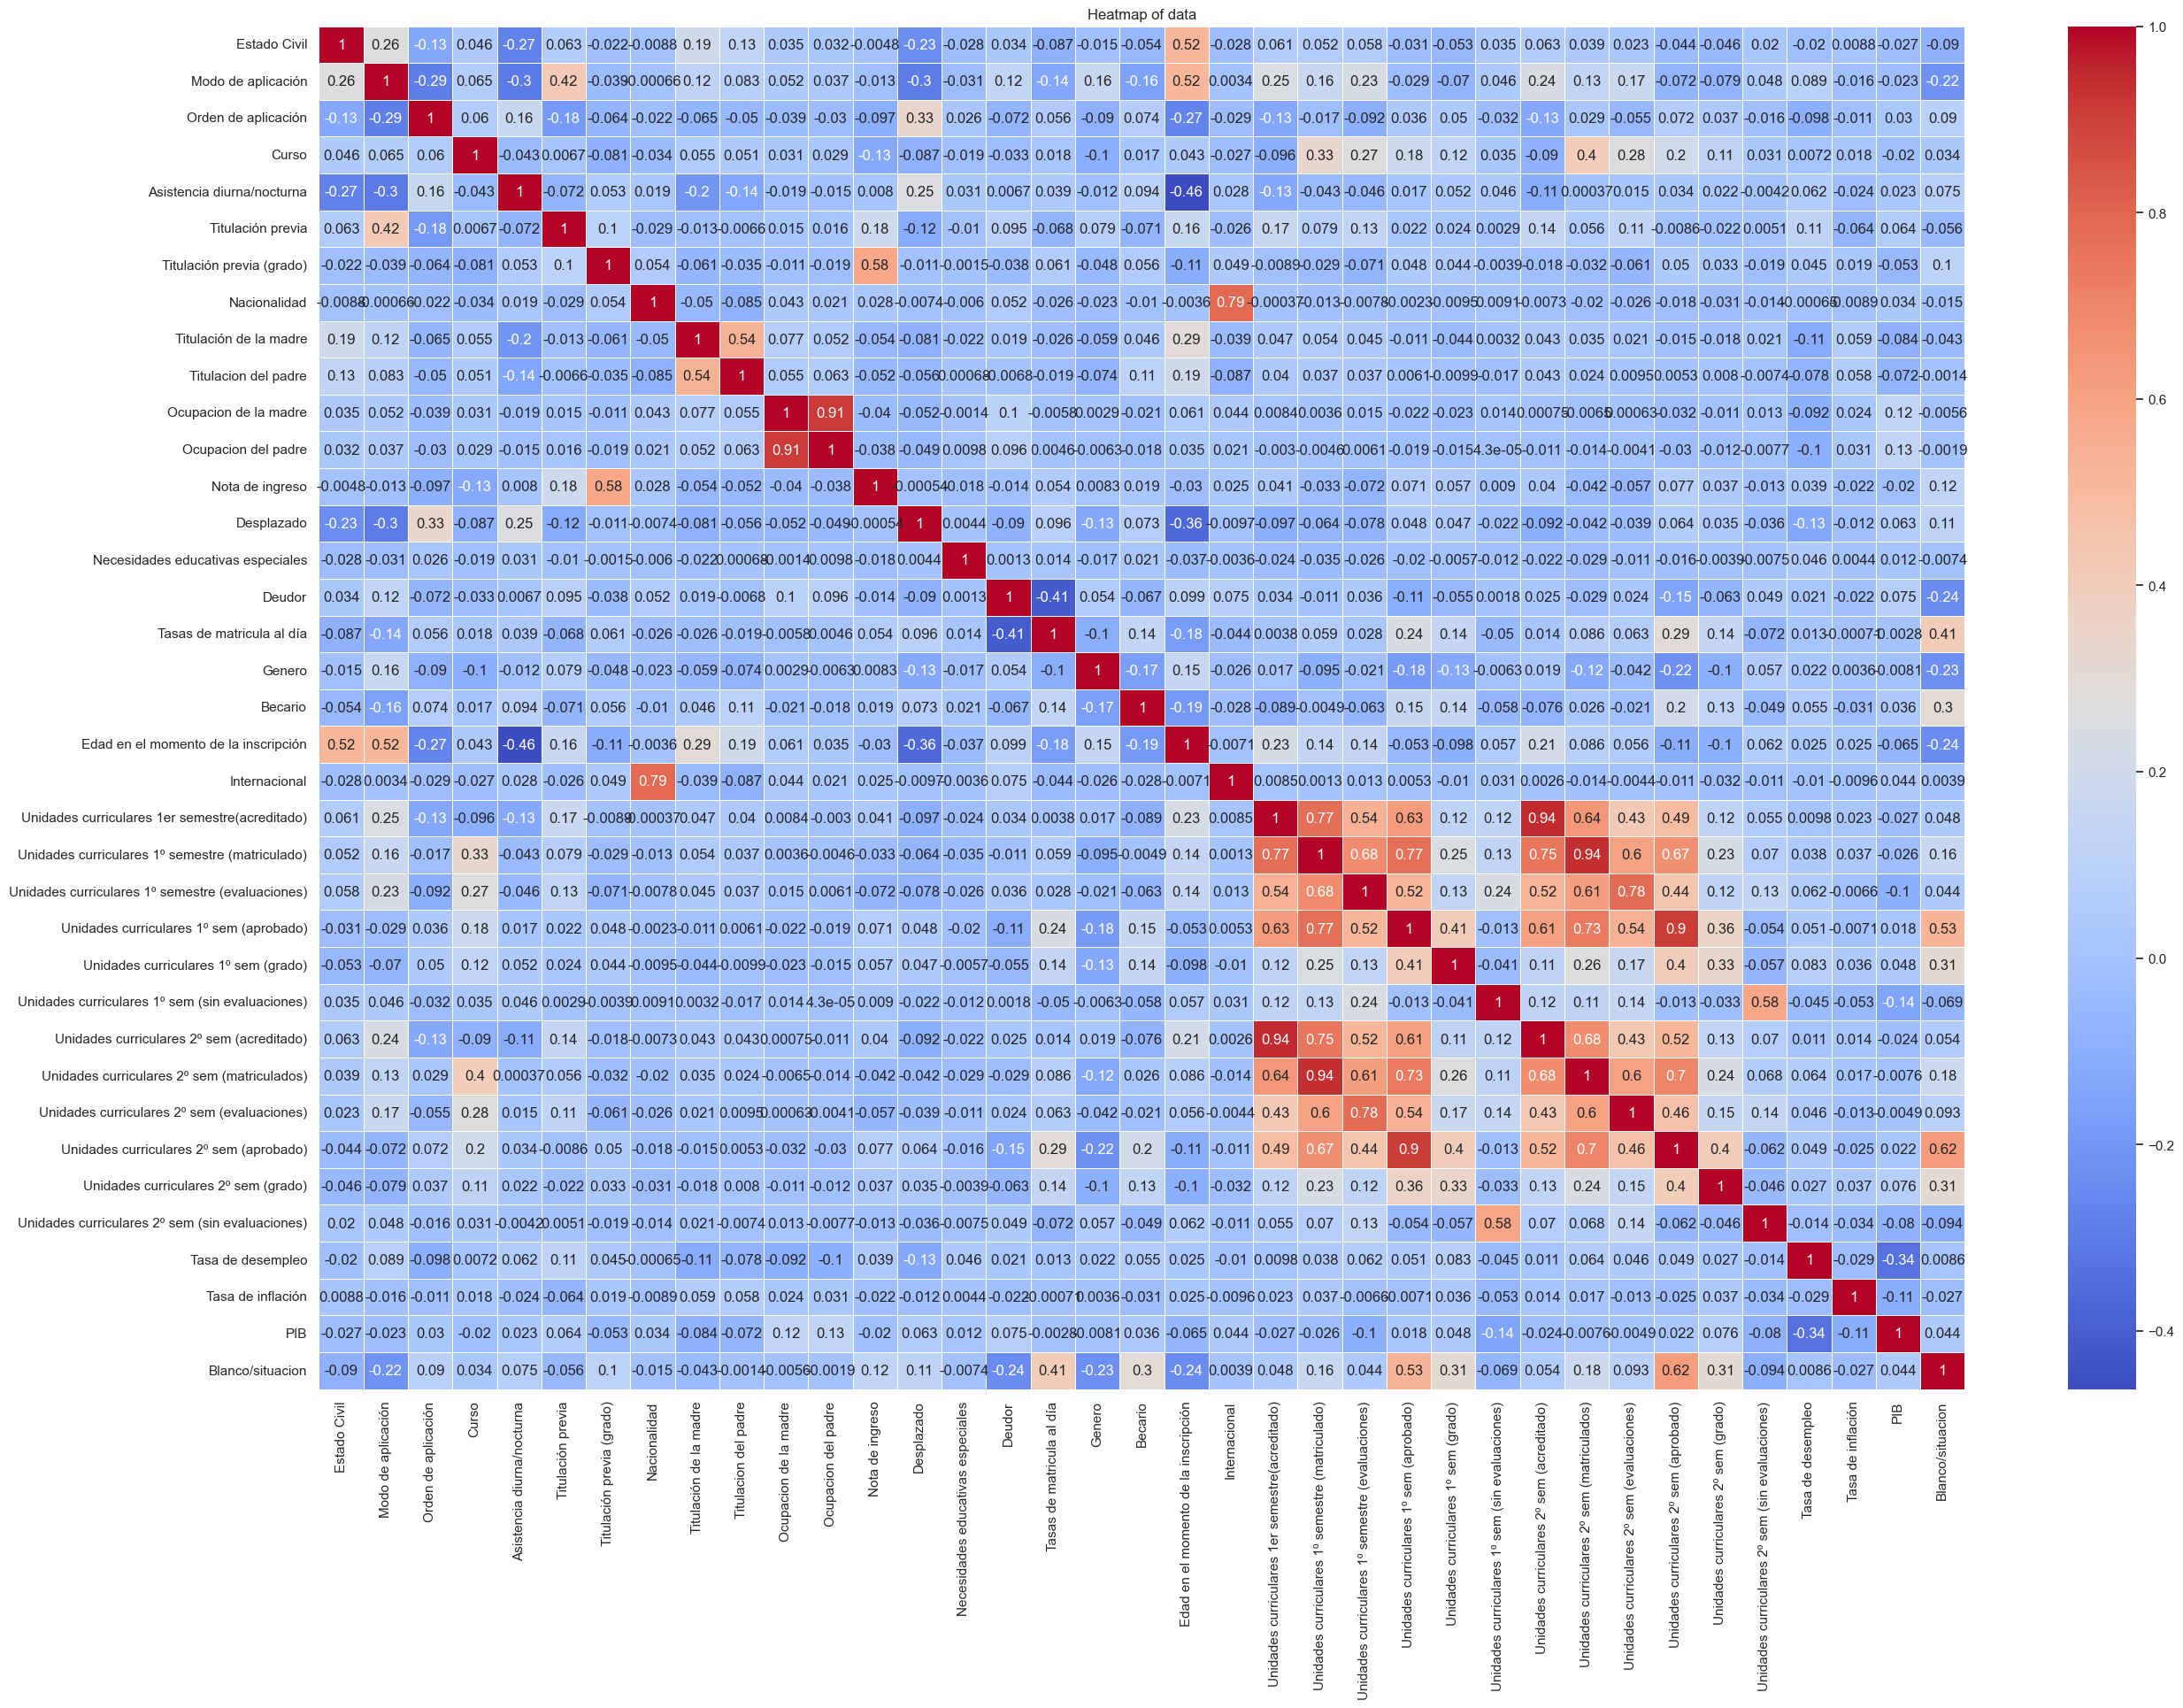

In [287]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
data = data.select_dtypes(include=[float, int])

# Crear el heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of data')
plt.show()

Como he visto antes en el mapa de correlaciones algunas muy correladas, las selecciono para visualizarlas mejor y repito el correlograma:

In [288]:
import pandas as pd

columns_to_select = [
    'Unidades curriculares 1er semestre(acreditado)',
    'Unidades curriculares 1º semestre (matriculado)',
    'Unidades curriculares 1º semestre (evaluaciones)',
    'Unidades curriculares 1º sem (aprobado)',
    'Unidades curriculares 1º sem (grado)',
    'Unidades curriculares 1º sem (sin evaluaciones)',
    'Unidades curriculares 2º sem (acreditado)',
    'Unidades curriculares 2º sem (matriculados)',
    'Unidades curriculares 2º sem (evaluaciones)',
    'Unidades curriculares 2º sem (aprobado)',
    'Unidades curriculares 2º sem (grado)',
    'Unidades curriculares 2º sem (sin evaluaciones)'
]
data_parte = data[columns_to_select]

Vuelvo a hacer el correlograma

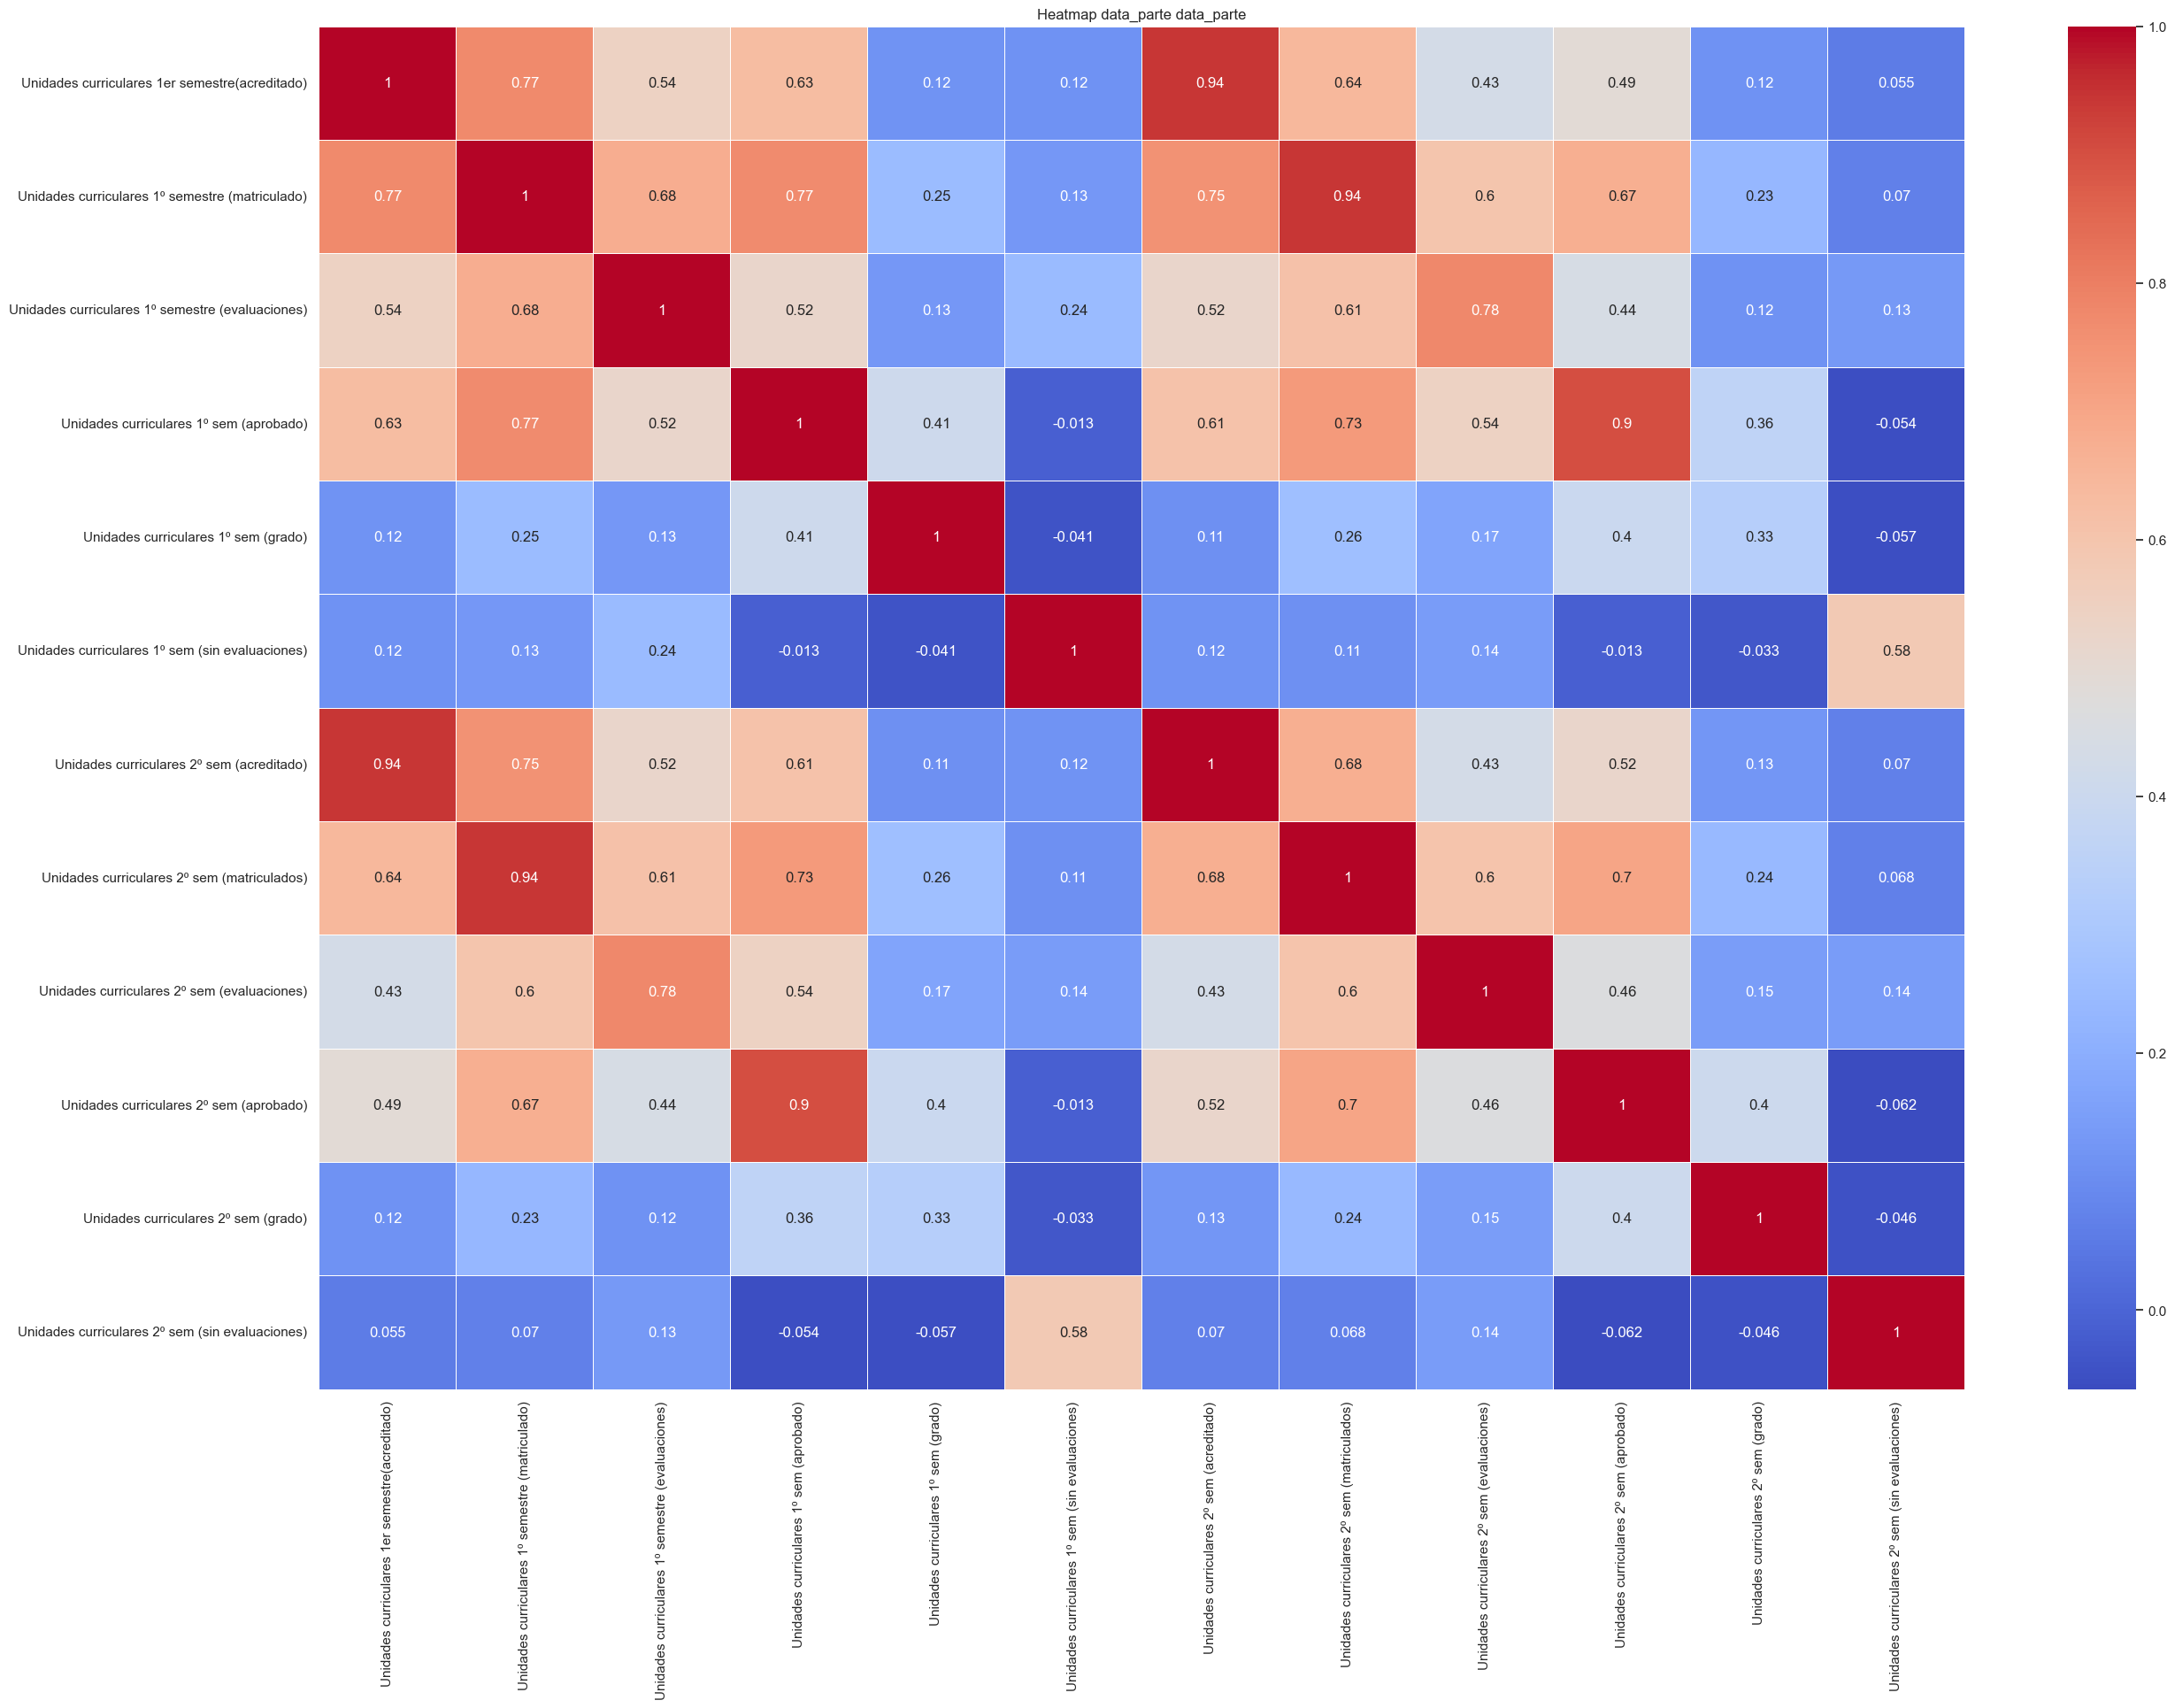

In [289]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
data_parte = data_parte.select_dtypes(include=[float, int])

# Crear el heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(data_parte.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap data_parte data_parte')
plt.show()

## <li> Las correlaciones más altas son las siguientes:</li>

##### <li>'1º semestre (aprobado)' con '2º semestre (aprobado)': 0.9</li>

##### <li>'Ocupacion del padre' con 'Ocupacion de la madre': (0.91)</li>

##### <li> 1er semestre (acreditado)' con:</li>
                                1. 1º semestre (matriculado)' (0.77)                
                                2. 2º semestre (acreditado)' (0.94)

##### <li> 1º semestre (matriculado)' con:</li>
                                1. 1º semestre (acreditado)' (0.77)
                                2. 1º semestre (aprobado)' (0.77)
                                3. 2º semestre (matriculados)' (0.94)
                                
##### <li> 2º semestre (acreditado)' con:</li>
                                1. 1er semestre (acreditado)' (0.94)
                                2. 2º semestre (matriculados)' (0.75)

### Uso Random Forest para evaluar la importancia de las variables:

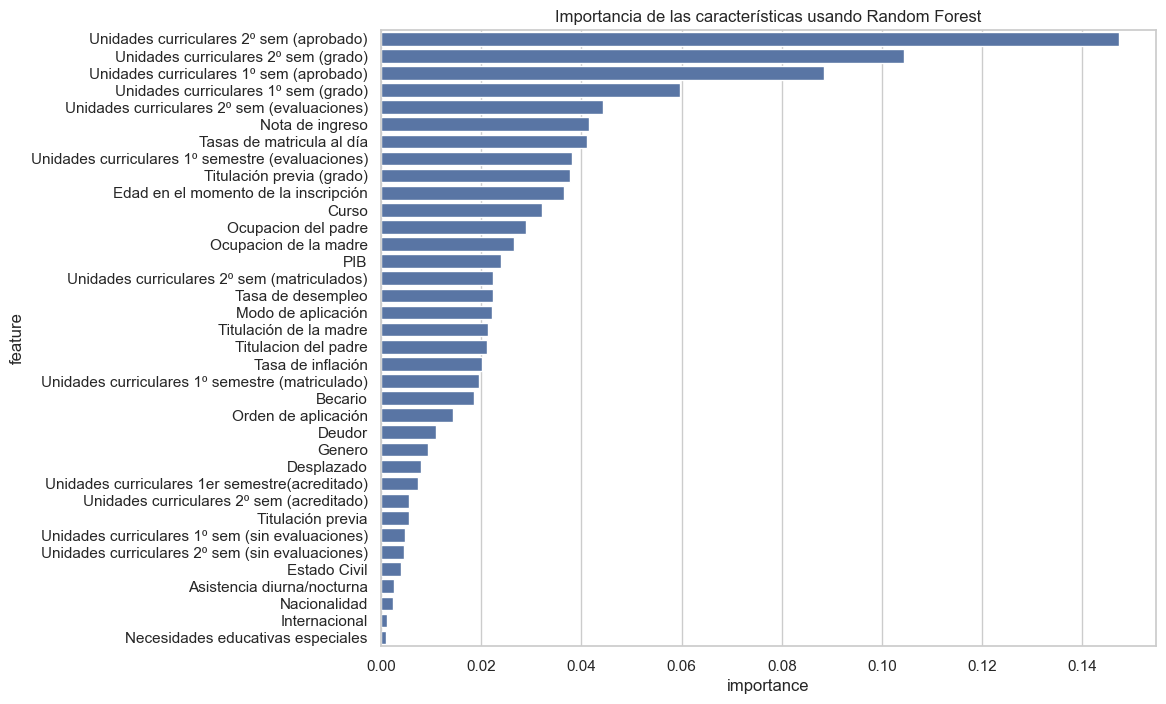

In [290]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# X será tu matriz de características y y será la etiqueta (el target)
X = data.drop(columns=['Blanco/situacion'])  # Sustituye con el nombre de tu columna objetivo
y = data['Blanco/situacion'] 

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Evaluar la importancia de las características
importances = rf_model.feature_importances_

# Crear un DataFrame con las características y su importancia
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Ordenar por importancia
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Importancia de las características usando Random Forest')
plt.show()


### Teniendo en cuenta el mapa de correlación y el random forest, voy a eliminar las siguientes variables escogidas por su alta correlación y decididas por Random Forest (de la pareja la variable que menos importa): 

##### 'Ocupación de  la madre',

##### 'Unidades curriculares 1º sem (aprobado)',

##### 'Unidades curriculares 1er sem (acreditado)',

### También, elimino variables que en el Random Forest que no tienen mucha importancia y meten ruido al modelo:

##### 'Internacional',

##### 'Nacionalidad',

##### 'Estado Civil',

##### 'Asistencia diurna/nocturna',

##### 'Orden de Aplicacion',

##### 'Unidades curriculares 1º y 2º sem (sin evaluaciónes)',

##### 'Necesidades educativas especiales',

#'¿PIB?, ¿Tasa de desempleo?, ¿Tasa de inflación?' En duda

In [291]:
print(data.columns.tolist())

['Estado Civil', 'Modo de aplicación', 'Orden de aplicación', 'Curso', 'Asistencia diurna/nocturna', 'Titulación previa', 'Titulación previa (grado)', 'Nacionalidad', 'Titulación de la madre', 'Titulacion del padre', 'Ocupacion de la madre', 'Ocupacion del padre', 'Nota de ingreso', 'Desplazado', 'Necesidades educativas especiales', 'Deudor', 'Tasas de matricula al día', 'Genero', 'Becario', 'Edad en el momento de la inscripción', 'Internacional', 'Unidades curriculares 1er semestre(acreditado)', 'Unidades curriculares 1º semestre (matriculado)', 'Unidades curriculares 1º semestre (evaluaciones)', 'Unidades curriculares 1º sem (aprobado)', 'Unidades curriculares 1º sem (grado)', 'Unidades curriculares 1º sem (sin evaluaciones)', 'Unidades curriculares 2º sem (acreditado)', 'Unidades curriculares 2º sem (matriculados)', 'Unidades curriculares 2º sem (evaluaciones)', 'Unidades curriculares 2º sem (aprobado)', 'Unidades curriculares 2º sem (grado)', 'Unidades curriculares 2º sem (sin eval

In [292]:
# Eliminar columnas adicionales por redundancia
columns_to_drop = [
    'Unidades curriculares 1er semestre(acreditado)',
    'Unidades curriculares 1º sem (sin evaluaciones)',
    'Unidades curriculares 2º sem (sin evaluaciones)',
    'Unidades curriculares 1º sem (aprobado)',
    'Ocupacion de la madre',
    'Internacional',
    'Estado Civil',
    'Asistencia diurna/nocturna',
    'Necesidades educativas especiales',
    'Orden de aplicación'
]

datadf = data.drop(columns=columns_to_drop)

# Verificar la forma final del DataFrame
print(f"Dimensiones del dataset final: {datadf.shape}")
print(f"Columnas del dataset final: {datadf.columns}")


Dimensiones del dataset final: (4424, 27)
Columnas del dataset final: Index(['Modo de aplicación', 'Curso', 'Titulación previa',
       'Titulación previa (grado)', 'Nacionalidad', 'Titulación de la madre',
       'Titulacion del padre', 'Ocupacion del padre', 'Nota de ingreso',
       'Desplazado', 'Deudor', 'Tasas de matricula al día', 'Genero',
       'Becario', 'Edad en el momento de la inscripción',
       'Unidades curriculares 1º semestre (matriculado)',
       'Unidades curriculares 1º semestre (evaluaciones)',
       'Unidades curriculares 1º sem (grado)',
       'Unidades curriculares 2º sem (acreditado)',
       'Unidades curriculares 2º sem (matriculados)',
       'Unidades curriculares 2º sem (evaluaciones)',
       'Unidades curriculares 2º sem (aprobado)',
       'Unidades curriculares 2º sem (grado)', 'Tasa de desempleo',
       'Tasa de inflación', 'PIB', 'Blanco/situacion'],
      dtype='object')


## Características más importantes
Unidades curriculares 2º sem (aprobado), Unidades curriculares 2º sem (grado), Unidades curriculares 1º sem (aprobado), y Unidades curriculares 1º sem (grado) son las características más importantes. Esto sugiere que el rendimiento académico en el primer y segundo semestre es crucial para predecir la deserción o el éxito académico.
Nota de ingreso y Titulación previa (grado) también son importantes, lo que indica que el rendimiento académico anterior y la formación previa juegan un papel significativo.
Características Menos Importantes:

En la parte inferior del gráfico, características como Estado Civil, Nacionalidad, Internacional, y Necesidades educativas especiales tienen una importancia muy baja en el modelo. Esto podría indicar que estas variables no aportan mucho valor predictivo para tu modelo en este contexto específico.
Qué Hacer con Esta Información:
Conserva las Características Importantes:

Mantén las características con alta importancia, ya que son las que más contribuyen a la predicción.
Elimina o Considera Menos las Características de Baja Importancia:

Podrías considerar eliminar características con una importancia muy baja (cercana a 0), ya que podrían estar añadiendo ruido al modelo sin mejorar su rendimiento.
Iteración y Optimización:

Puedes realizar pruebas adicionales, como eliminar las características menos importantes y observar cómo cambia el rendimiento del modelo. Esto puede ayudarte a simplificar el modelo sin perder precisión.
Considera la Interpretabilidad:

Si el modelo necesita ser interpretable, como en casos donde debes justificar las decisiones a partes interesadas, podrías priorizar características que sean fácilmente comprensibles.


## Conclusión:
El gráfico muestra que el desempeño académico (notas, unidades aprobadas, etc.) es el factor más importante en tu modelo para predecir la deserción o éxito académico. Basado en esta información, puedes ajustar tu modelo y simplificar el conjunto de características manteniendo aquellas que realmente aportan al rendimiento predictivo.

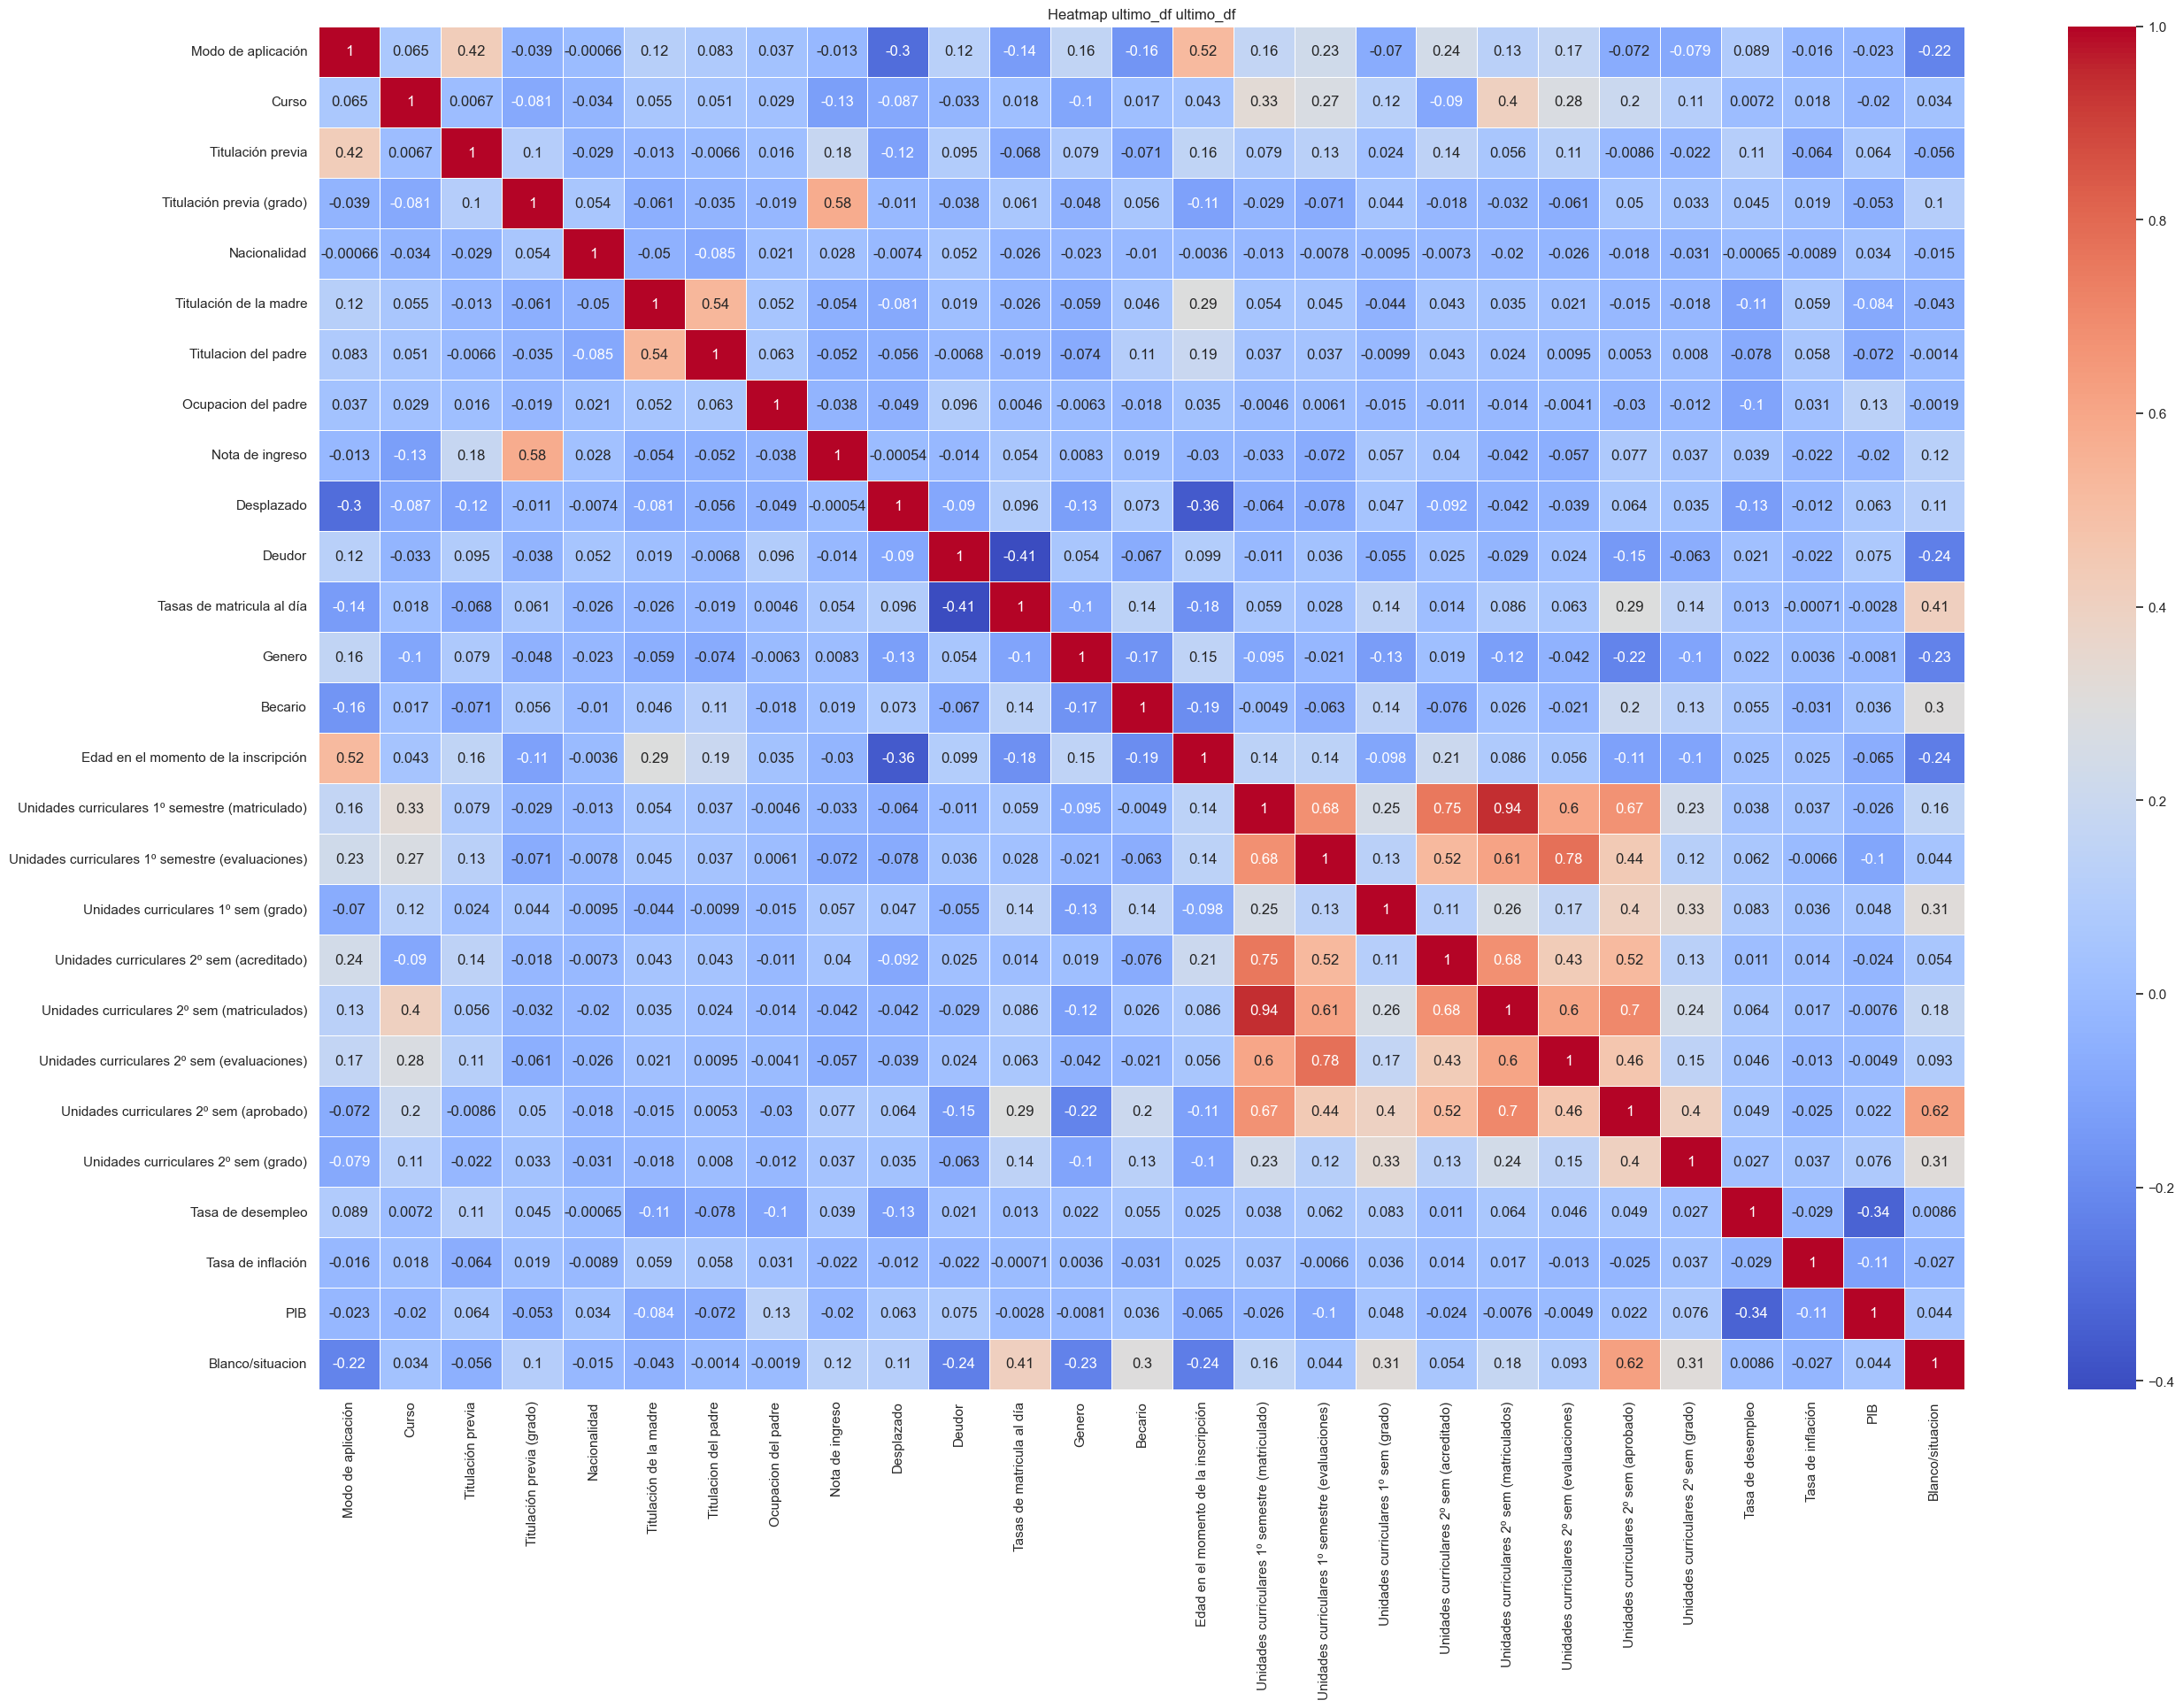

In [293]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
ultimo_df = datadf.select_dtypes(include=[float, int])

# Crear el heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(ultimo_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap ultimo_df ultimo_df')
plt.show()

Finalmente me quedo con unos datos de tamaño (4424, 26).

Procesamiento de datos:

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Dividir características y variable objetivo
X = data.drop('Blanco/situacion', axis=1)
y = data['Blanco/situacion']

# Codificación de variables categóricas y manejo de valores nulos
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Pipeline para preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X = preprocessor.fit_transform(X)


Divido el conjunto de datos:

In [295]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Entreno el modelo:

[[213  26  45]
 [ 37  59  63]
 [  9  23 410]]
              precision    recall  f1-score   support

           1       0.82      0.75      0.78       284
           2       0.55      0.37      0.44       159
           3       0.79      0.93      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885

ROC AUC Score: 0.8849948158612722


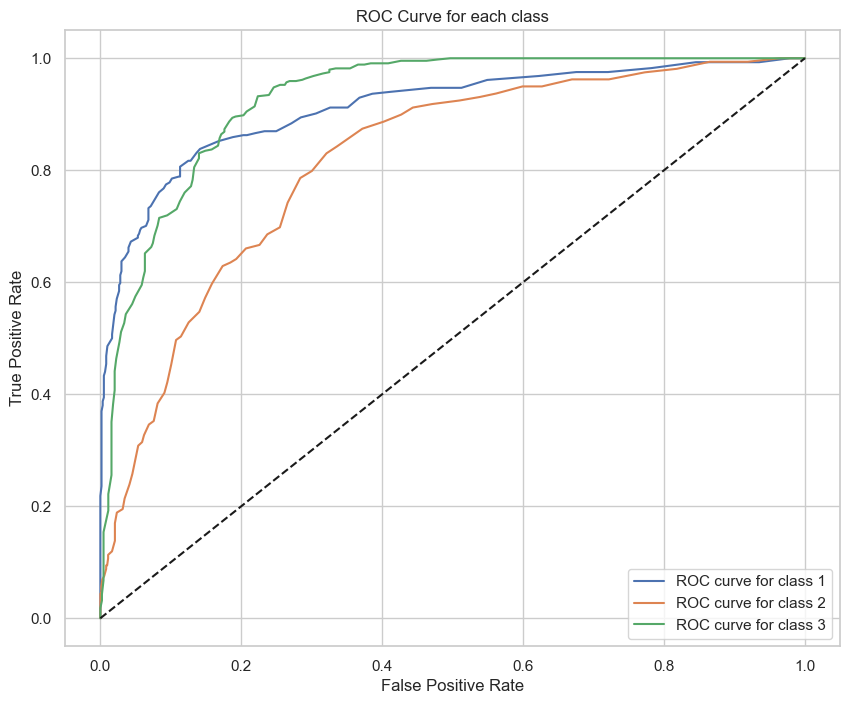

In [296]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Entrenar un modelo de Random Forest
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Evaluación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calcular el ROC AUC para un problema multiclase
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print('ROC AUC Score:', roc_auc)

# Curva ROC para cada clase
fpr = {}
tpr = {}
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == model.classes_[i], y_proba[:, i])

# Dibujar las curvas ROC para cada clase
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {model.classes_[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='best')
plt.show()


Ajuste de hipermarámetros:

In [297]:
from sklearn.model_selection import GridSearchCV

# Grid Search para Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros: ", grid_search.best_params_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
106 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pack

Mejores hiperparámetros:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


Interpretación del modelo:

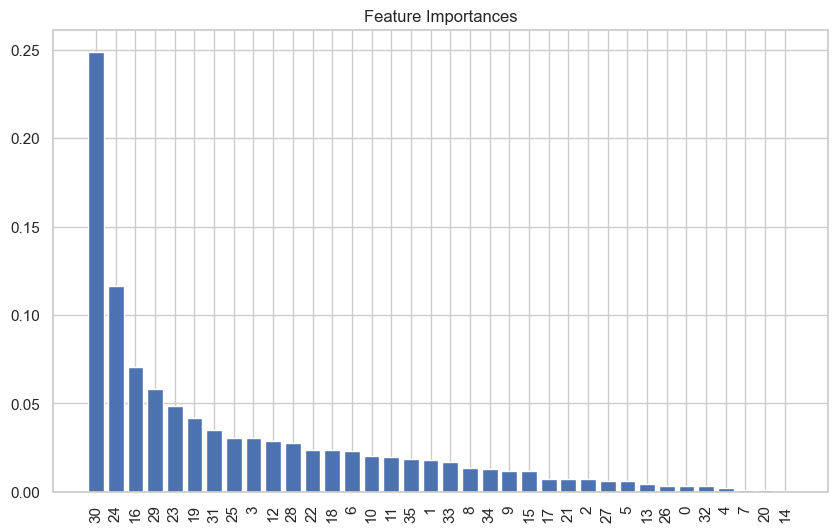

In [298]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices, rotation=90)
plt.show()

Predicción y evaluación final:

In [299]:
from sklearn.metrics import classification_report, roc_auc_score

# Realizar predicciones finales con el modelo ajustado
y_pred_final = best_model.predict(X_test)

# Evaluar el rendimiento final
print(classification_report(y_test, y_pred_final))

# Evaluar el ROC AUC Score para un problema de clasificación multiclase
# Especificar el parámetro multi_class='ovr' para clasificación multiclase
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')
print('ROC AUC Score:', roc_auc)


              precision    recall  f1-score   support

           1       0.83      0.70      0.76       284
           2       0.46      0.60      0.52       159
           3       0.85      0.84      0.84       442

    accuracy                           0.75       885
   macro avg       0.71      0.71      0.71       885
weighted avg       0.77      0.75      0.76       885

ROC AUC Score: 0.8854510552225895


Guardo y despliego el modelo:

In [300]:
import joblib

# Guardar el modelo entrenado
joblib.dump(best_model, 'modelo_entrenado.pkl')

# Para cargar el modelo más tarde
# model = joblib.load('modelo_entrenado.pkl')


['modelo_entrenado.pkl']

C:\Users\User\AppData\Local\Temp\ipykernel_20236\216111499.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Blanco/situacion', data=data, palette='viridis')


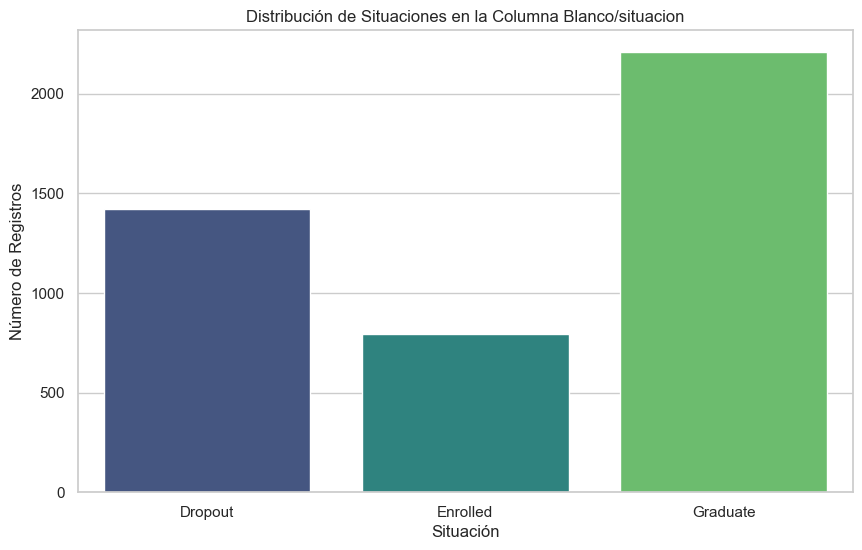

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama `data`
# data = pd.read_csv('tu_archivo.csv')  # Cargar datos si es necesario

# Configura el estilo de los gráficos
sns.set(style="whitegrid")

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Blanco/situacion', data=data, palette='viridis')
plt.xlabel('Situación')
plt.ylabel('Número de Registros')
plt.title('Distribución de Situaciones en la Columna Blanco/situacion')
plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
plt.show()


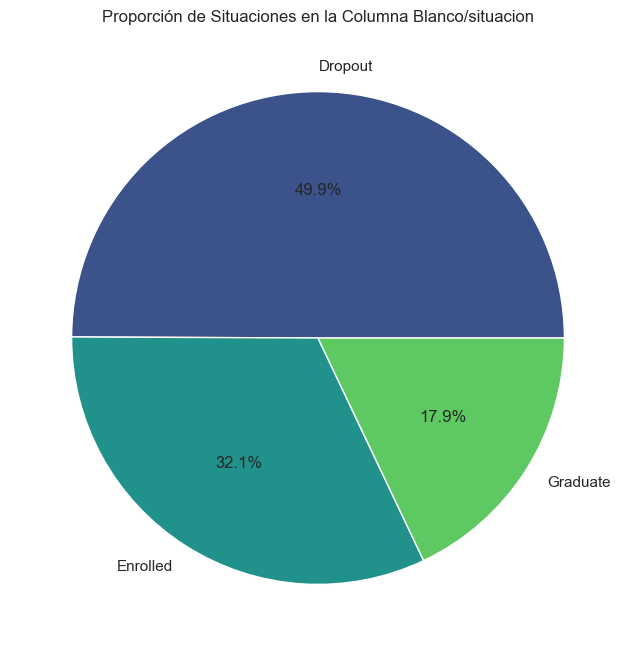

In [302]:
# Contar las frecuencias de cada categoría
situacion_counts = data['Blanco/situacion'].value_counts()

# Crea un gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(situacion_counts, labels=['Dropout', 'Enrolled', 'Graduate'], autopct='%1.1f%%', colors=sns.color_palette('viridis', 3))
plt.title('Proporción de Situaciones en la Columna Blanco/situacion')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_20236\3568337649.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Blanco/situacion', y='Nota de ingreso', data=data, palette='viridis')


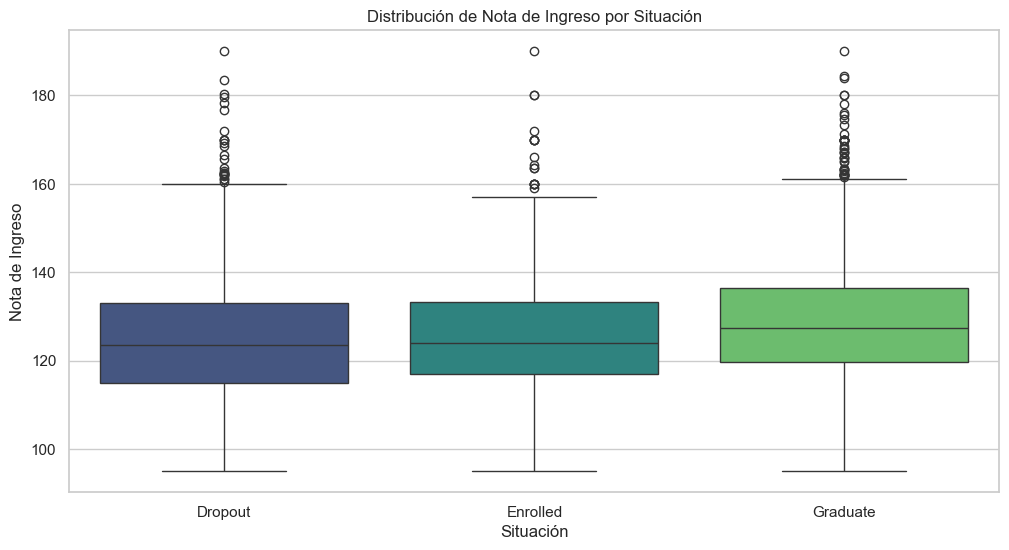

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'Nota de ingreso' existe en tu DataFrame
if 'Nota de ingreso' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Blanco/situacion', y='Nota de ingreso', data=data, palette='viridis')
    plt.xlabel('Situación')
    plt.ylabel('Nota de Ingreso')
    plt.title('Distribución de Nota de Ingreso por Situación')
    plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
    plt.show()
else:
    print("La columna 'Nota de ingreso' no está en el DataFrame.")


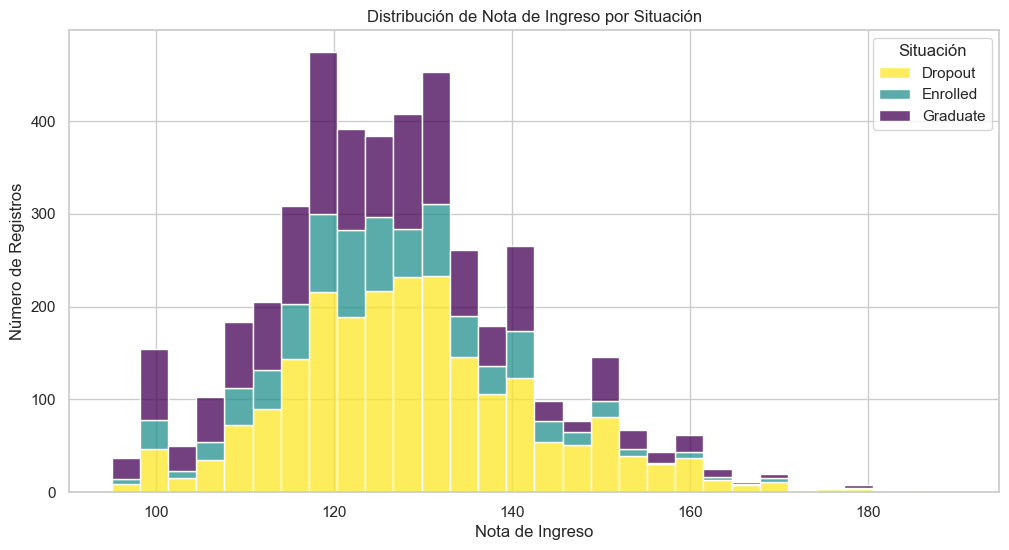

In [304]:
if 'Nota de ingreso' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x='Nota de ingreso', hue='Blanco/situacion', multiple='stack', palette='viridis', bins=30)
    plt.xlabel('Nota de Ingreso')
    plt.ylabel('Número de Registros')
    plt.title('Distribución de Nota de Ingreso por Situación')
    plt.legend(title='Situación', labels=['Dropout', 'Enrolled', 'Graduate'])
    plt.show()
else:
    print("La columna 'Nota de ingreso' no está en el DataFrame.")


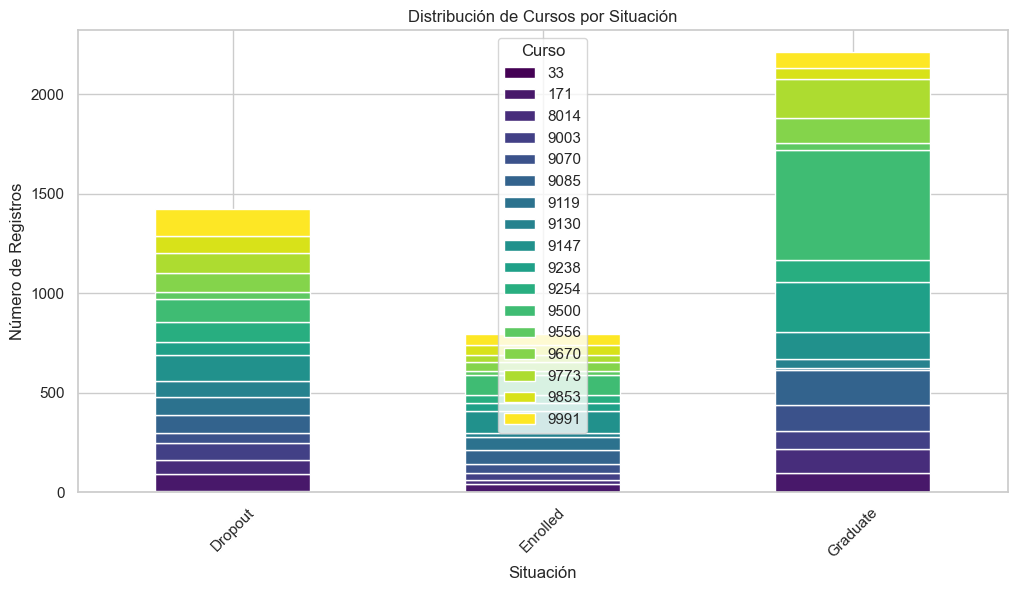

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las frecuencias de cada combinación de 'Blanco/situacion' y 'Curso'
pivot_table_course = data.pivot_table(index='Blanco/situacion', columns='Curso', aggfunc='size', fill_value=0)

# Crear el gráfico de barras apiladas
pivot_table_course.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Situación')
plt.ylabel('Número de Registros')
plt.title('Distribución de Cursos por Situación')
plt.legend(title='Curso')
plt.xticks(ticks=range(len(pivot_table_course.index)), labels=['Dropout', 'Enrolled', 'Graduate'], rotation=45)
plt.show()


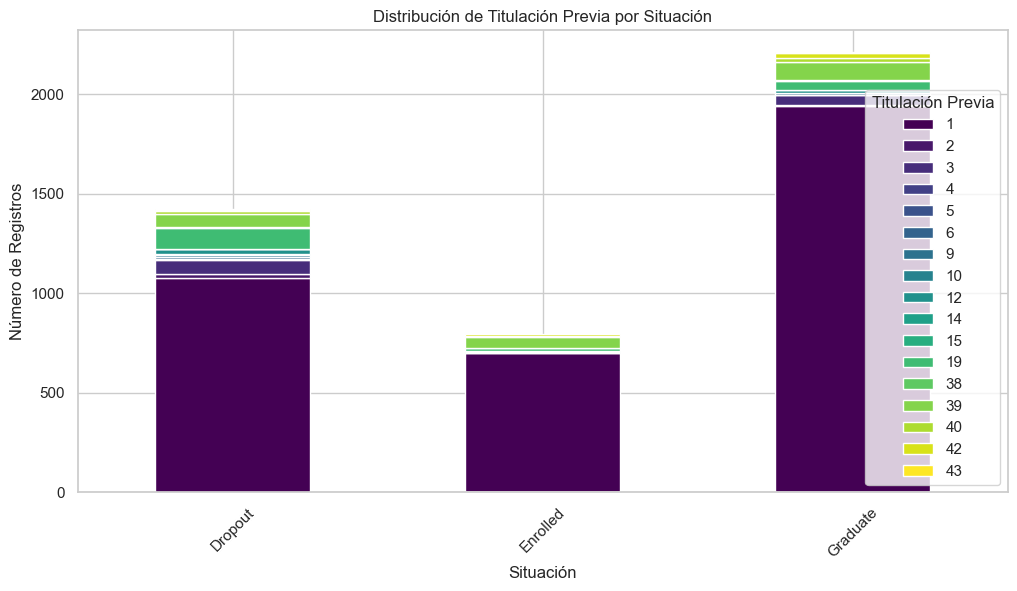

In [306]:
# Contar las frecuencias de cada combinación de 'Blanco/situacion' y 'Titulación previa'
pivot_table_titulacion = data.pivot_table(index='Blanco/situacion', columns='Titulación previa', aggfunc='size', fill_value=0)

# Crear el gráfico de barras apiladas
pivot_table_titulacion.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Situación')
plt.ylabel('Número de Registros')
plt.title('Distribución de Titulación Previa por Situación')
plt.legend(title='Titulación Previa')
plt.xticks(ticks=range(len(pivot_table_titulacion.index)), labels=['Dropout', 'Enrolled', 'Graduate'], rotation=45)
plt.show()


Boxplot: Nota de ingreso x Curso:

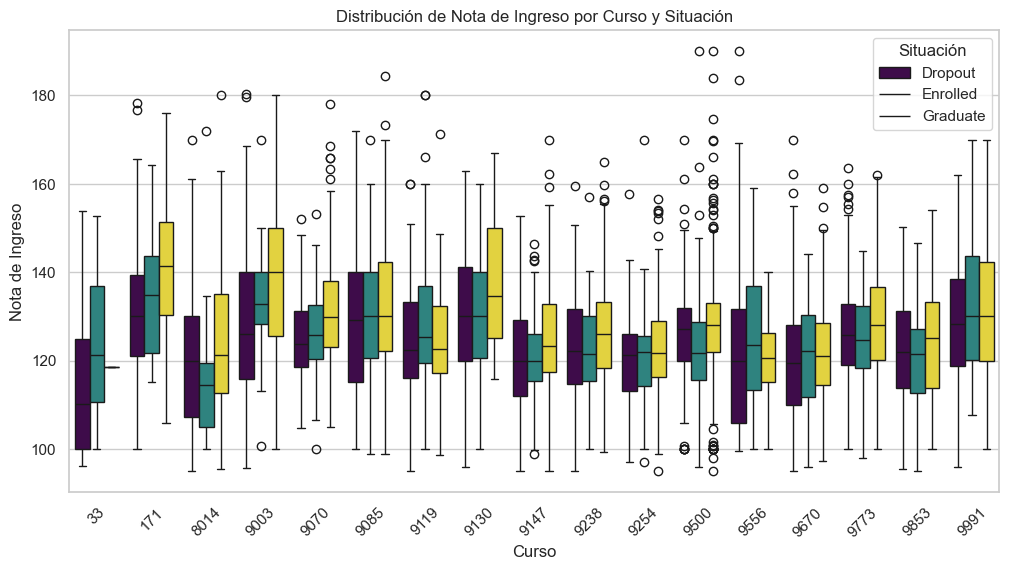

In [307]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Curso', y='Nota de ingreso', hue='Blanco/situacion', data=data, palette='viridis')
plt.xlabel('Curso')
plt.ylabel('Nota de Ingreso')
plt.title('Distribución de Nota de Ingreso por Curso y Situación')
plt.legend(title='Situación', labels=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(rotation=45)
plt.show()


Boxplot de Nota de ingreso x Titulacion previa:

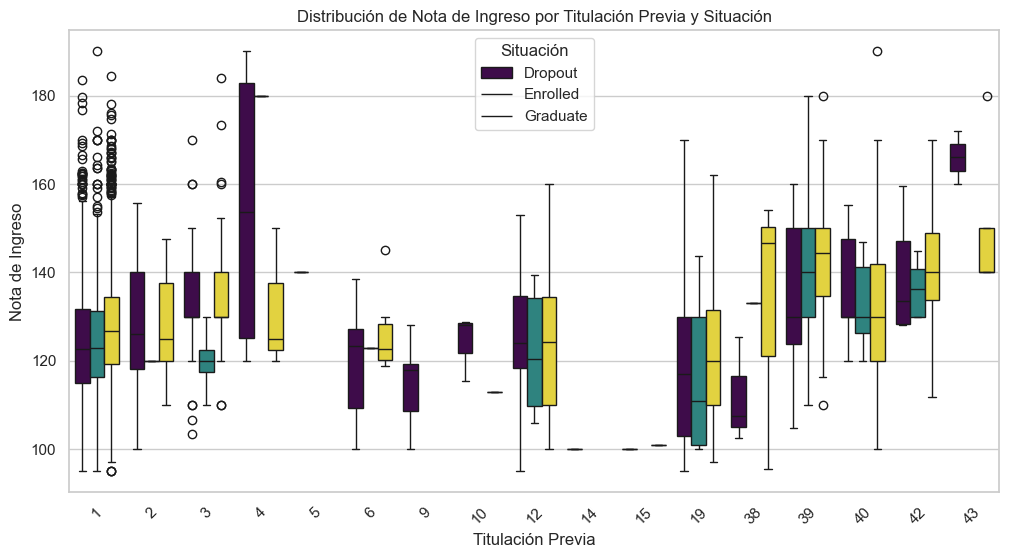

In [308]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Titulación previa', y='Nota de ingreso', hue='Blanco/situacion', data=data, palette='viridis')
plt.xlabel('Titulación Previa')
plt.ylabel('Nota de Ingreso')
plt.title('Distribución de Nota de Ingreso por Titulación Previa y Situación')
plt.legend(title='Situación', labels=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(rotation=45)
plt.show()


## Análisis de la nacionalidad:

In [321]:
import pandas as pd

# Paso 1: Definir el diccionario
nacionalidades_dict = {
    1: 'Portugués',
    2: 'Alemán',
    6: 'Español',
    11: 'Italiano',
    13: 'Neerlandés',
    14: 'Inglés',
    17: 'Lituano',
    21: 'Angoleño',
    22: 'Cabo Verde',
    24: 'Guineano',
    25: 'Mozambiqueño',
    26: 'Santomea',
    32: 'Turco',
    41: 'Brasileño',
    62: 'Rumano',
    100: 'Moldova (República de)',
    101: 'Mexicano',
    103: 'Ucraniano',
    105: 'Ruso',
    108: 'Cubano',
    109: 'Colombiana'
}

# Paso 2: Mapear los códigos de la columna 'Nacionalidad' a sus descripciones
data['Descripción Nacionalidad'] = data['Nacionalidad'].map(nacionalidades_dict)

# Paso 3: Crear el DataFrame final con las dos columnas deseadas
nacionalidades_df = data[['Nacionalidad', 'Descripción Nacionalidad','Blanco/situacion']]

# Mostrar el DataFrame resultante
print(nacionalidades_df)

      Nacionalidad Descripción Nacionalidad  Blanco/situacion
0                1                Portugués                 1
1                1                Portugués                 3
2                1                Portugués                 1
3                1                Portugués                 3
4                1                Portugués                 3
...            ...                      ...               ...
4419             1                Portugués                 3
4420           105                     Ruso                 1
4421             1                Portugués                 1
4422             1                Portugués                 3
4423            22               Cabo Verde                 3

[4424 rows x 3 columns]


![Mi Imagen](LINEAS-Nacionalidad.png)


## Análisis estadístico para Nota de ingreso x Blanco/situacion x Curso x Titulacion previa:

### Curso:

In [310]:
course_stats = data.groupby(['Blanco/situacion', 'Curso'])['Nota de ingreso'].describe()
print(course_stats)

                        count        mean        std    min      25%     50%  \
Blanco/situacion Curso                                                         
1                33       8.0  116.262500  21.089736   96.1  100.000  110.10   
                 171     82.0  131.412195  16.550047  100.0  121.025  130.00   
                 8014    71.0  119.826761  16.717057   95.0  107.250  120.00   
                 9003    86.0  127.439535  17.985002   95.8  115.925  126.10   
                 9070    51.0  125.176471  11.066085  104.8  118.650  123.80   
                 9085    90.0  128.983333  17.022749  100.0  115.200  129.10   
                 9119    92.0  124.690217  14.461142   95.1  116.175  122.50   
                 9130    78.0  130.600000  16.730088   96.0  120.000  130.00   
                 9147   134.0  120.524627  12.394405   95.0  112.025  120.00   
                 9238    65.0  123.187692  12.899243   95.0  114.800  122.10   
                 9254    96.0  119.62708

Titulacion previa:

In [311]:
titulacion_stats = data.groupby(['Blanco/situacion', 'Titulación previa'])['Nota de ingreso'].describe()
print(titulacion_stats)

                                     count        mean        std    min  \
Blanco/situacion Titulación previa                                         
1                1                  1078.0  124.182096  14.315791   95.0   
                 2                    16.0  127.006250  16.998489  100.0   
                 3                    75.0  133.202667  11.604169  103.4   
                 4                     4.0  154.350000  35.951217  120.0   
                 5                     1.0  140.000000        NaN  140.0   
                 6                     7.0  119.271429  13.530055  100.0   
                 9                    11.0  113.836364   8.600962  100.0   
                 10                    3.0  124.166667   7.511547  115.5   
                 12                   26.0  124.280769  14.755718   95.1   
                 14                    1.0  100.000000        NaN  100.0   
                 15                    1.0  100.000000        NaN  100.0   
            

Heatmap para Curso:

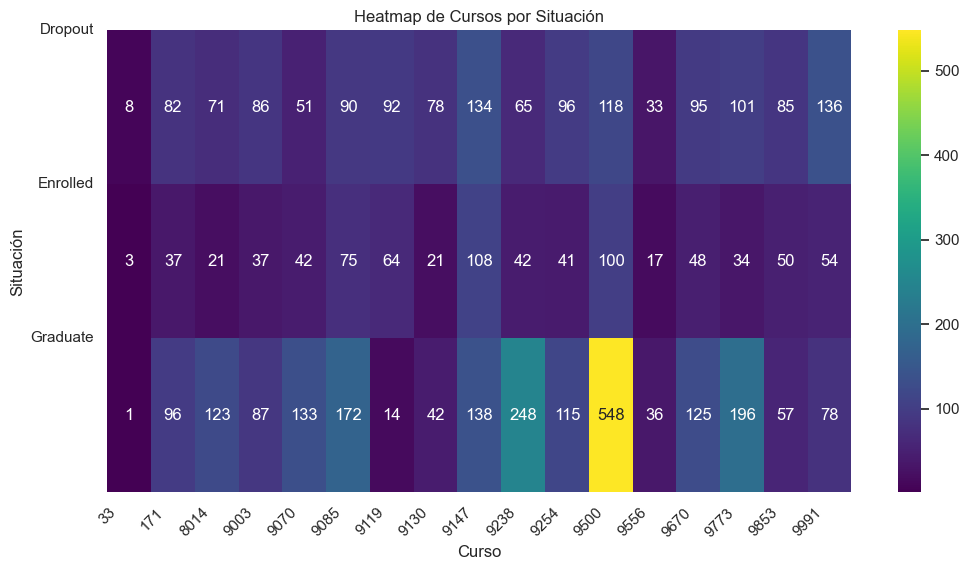

In [312]:
import seaborn as sns

# Contar las frecuencias de cada combinación de 'Blanco/situacion' y 'Curso'
heatmap_data_course = data.pivot_table(index='Blanco/situacion', columns='Curso', aggfunc='size', fill_value=0)

# Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_course, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Curso')
plt.ylabel('Situación')
plt.title('Heatmap de Cursos por Situación')
plt.xticks(ticks=range(len(heatmap_data_course.columns)), labels=heatmap_data_course.columns, rotation=45)
plt.yticks(ticks=range(len(heatmap_data_course.index)), labels=['Dropout', 'Enrolled', 'Graduate'], rotation=0)
plt.show()

Heatmap para Titulacion previa:

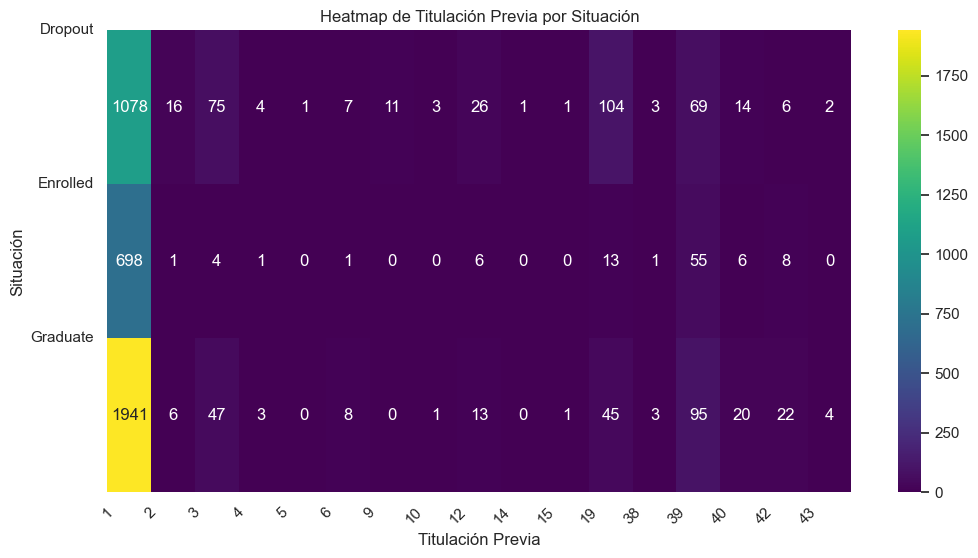

In [313]:
# Contar las frecuencias de cada combinación de 'Blanco/situacion' y 'Titulación previa'
heatmap_data_titulacion = data.pivot_table(index='Blanco/situacion', columns='Titulación previa', aggfunc='size', fill_value=0)

# Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_titulacion, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Titulación Previa')
plt.ylabel('Situación')
plt.title('Heatmap de Titulación Previa por Situación')
plt.xticks(ticks=range(len(heatmap_data_titulacion.columns)), labels=heatmap_data_titulacion.columns, rotation=45)
plt.yticks(ticks=range(len(heatmap_data_titulacion.index)), labels=['Dropout', 'Enrolled', 'Graduate'], rotation=0)
plt.show()

Curso x Blanco/situacion:

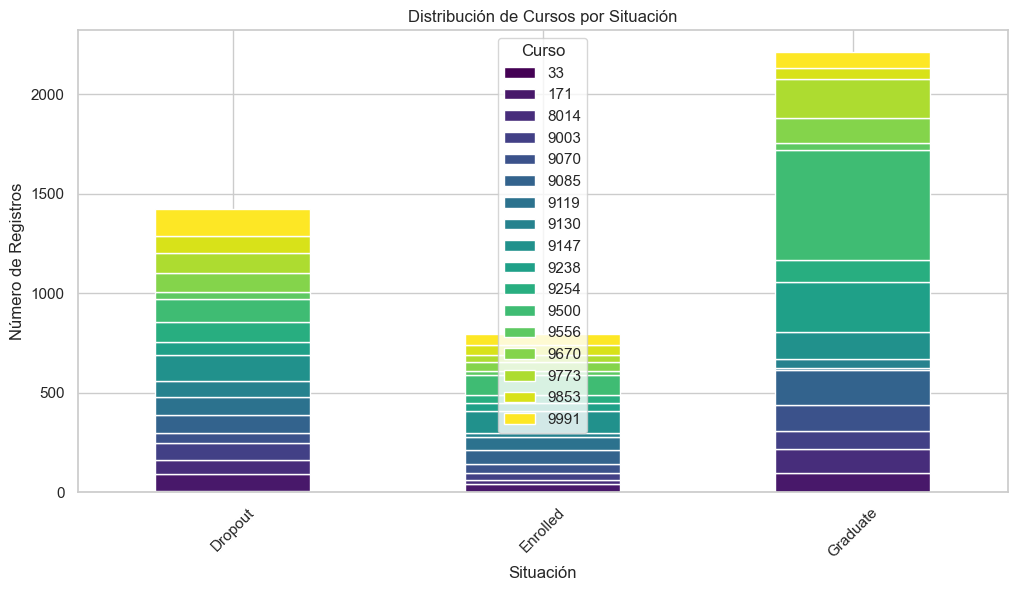

In [314]:
import matplotlib.pyplot as plt

# Contar las frecuencias de cada combinación de 'Blanco/situacion' y 'Curso'
pivot_table_course = data.pivot_table(index='Blanco/situacion', columns='Curso', aggfunc='size', fill_value=0)

# Crear el gráfico de barras apiladas
pivot_table_course.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Situación')
plt.ylabel('Número de Registros')
plt.title('Distribución de Cursos por Situación')
plt.legend(title='Curso')
plt.xticks(ticks=range(len(pivot_table_course.index)), labels=['Dropout', 'Enrolled', 'Graduate'], rotation=45)
plt.show()


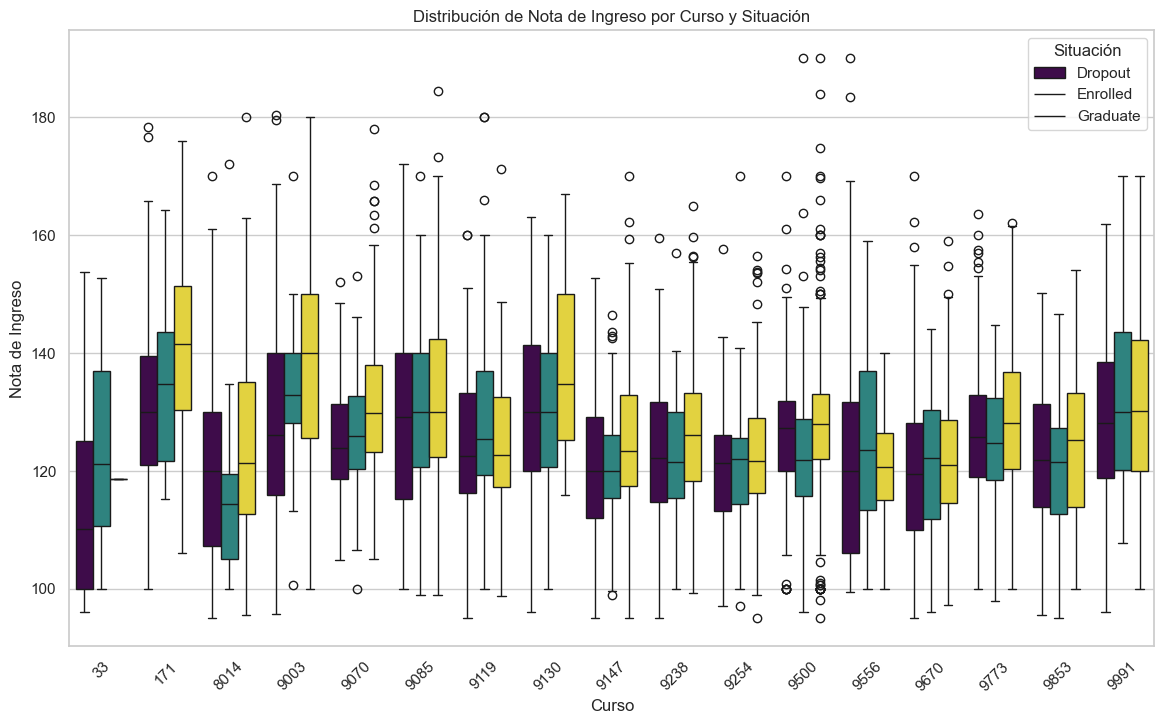

In [315]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(x='Curso', y='Nota de ingreso', hue='Blanco/situacion', data=data, palette='viridis')
plt.xlabel('Curso')
plt.ylabel('Nota de Ingreso')
plt.title('Distribución de Nota de Ingreso por Curso y Situación')
plt.legend(title='Situación', labels=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(rotation=45)
plt.show()

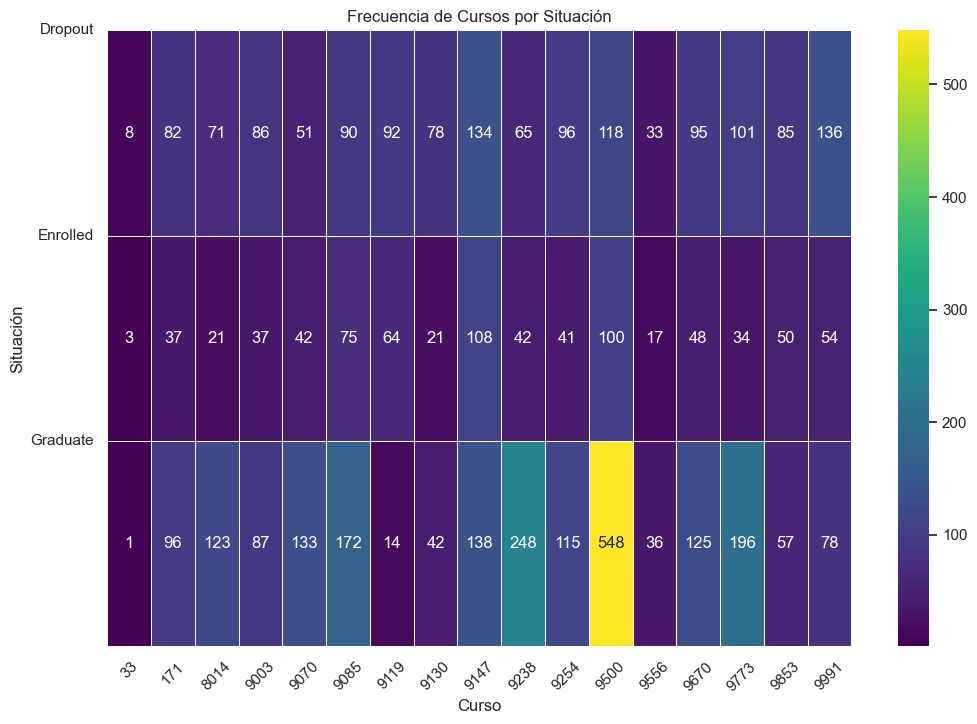

In [316]:
plt.figure(figsize=(12, 8))
heatmap_data = data.pivot_table(index='Blanco/situacion', columns='Curso', aggfunc='size', fill_value=0)

# Crear el heatmap
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='d', linewidths=0.5)
plt.xlabel('Curso')
plt.ylabel('Situación')
plt.title('Frecuencia de Cursos por Situación')
plt.xticks(rotation=45)
plt.yticks(ticks=range(len(heatmap_data.index)), labels=['Dropout', 'Enrolled', 'Graduate'], rotation=0)
plt.show()


In [317]:
course_stats = data.groupby(['Blanco/situacion', 'Curso'])['Nota de ingreso'].describe()
print(course_stats)

                        count        mean        std    min      25%     50%  \
Blanco/situacion Curso                                                         
1                33       8.0  116.262500  21.089736   96.1  100.000  110.10   
                 171     82.0  131.412195  16.550047  100.0  121.025  130.00   
                 8014    71.0  119.826761  16.717057   95.0  107.250  120.00   
                 9003    86.0  127.439535  17.985002   95.8  115.925  126.10   
                 9070    51.0  125.176471  11.066085  104.8  118.650  123.80   
                 9085    90.0  128.983333  17.022749  100.0  115.200  129.10   
                 9119    92.0  124.690217  14.461142   95.1  116.175  122.50   
                 9130    78.0  130.600000  16.730088   96.0  120.000  130.00   
                 9147   134.0  120.524627  12.394405   95.0  112.025  120.00   
                 9238    65.0  123.187692  12.899243   95.0  114.800  122.10   
                 9254    96.0  119.62708

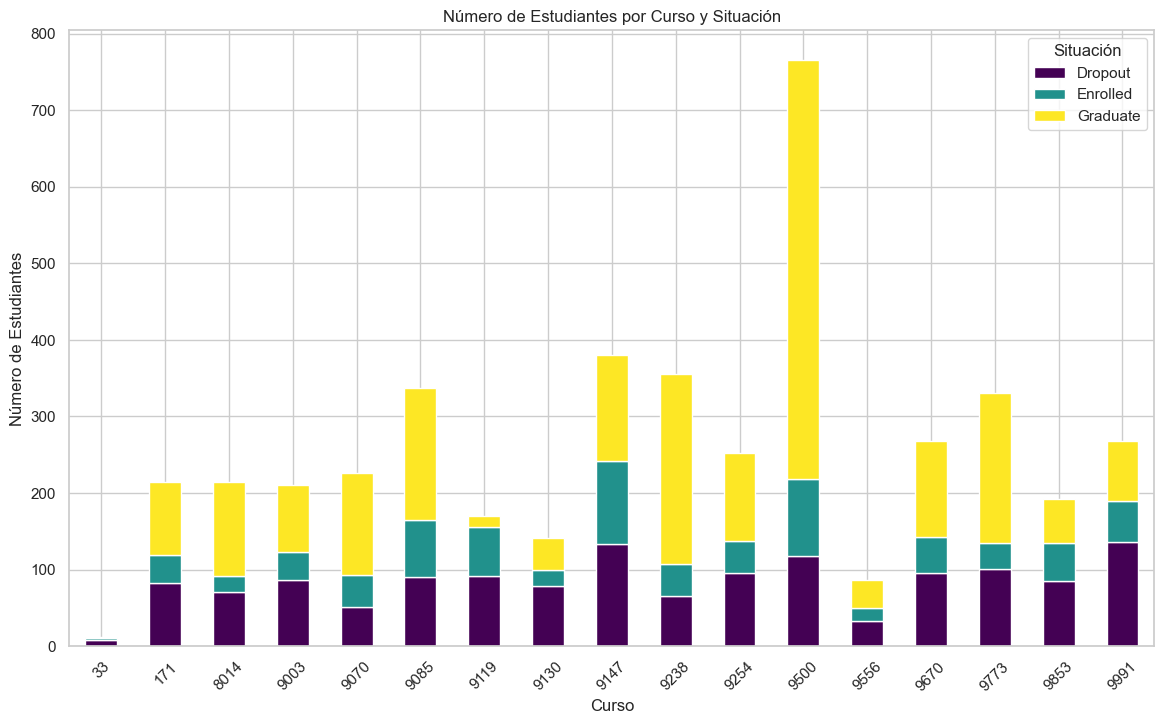

In [318]:
# Contar la cantidad de estudiantes en cada combinación de 'Curso' y 'Blanco/situacion'
course_counts = data.groupby(['Curso', 'Blanco/situacion']).size().unstack()

# Crear el gráfico de barras
course_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.xlabel('Curso')
plt.ylabel('Número de Estudiantes')
plt.title('Número de Estudiantes por Curso y Situación')
plt.legend(title='Situación', labels=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(rotation=45)
plt.show()


Análisis exploratorio de datos (EDA)

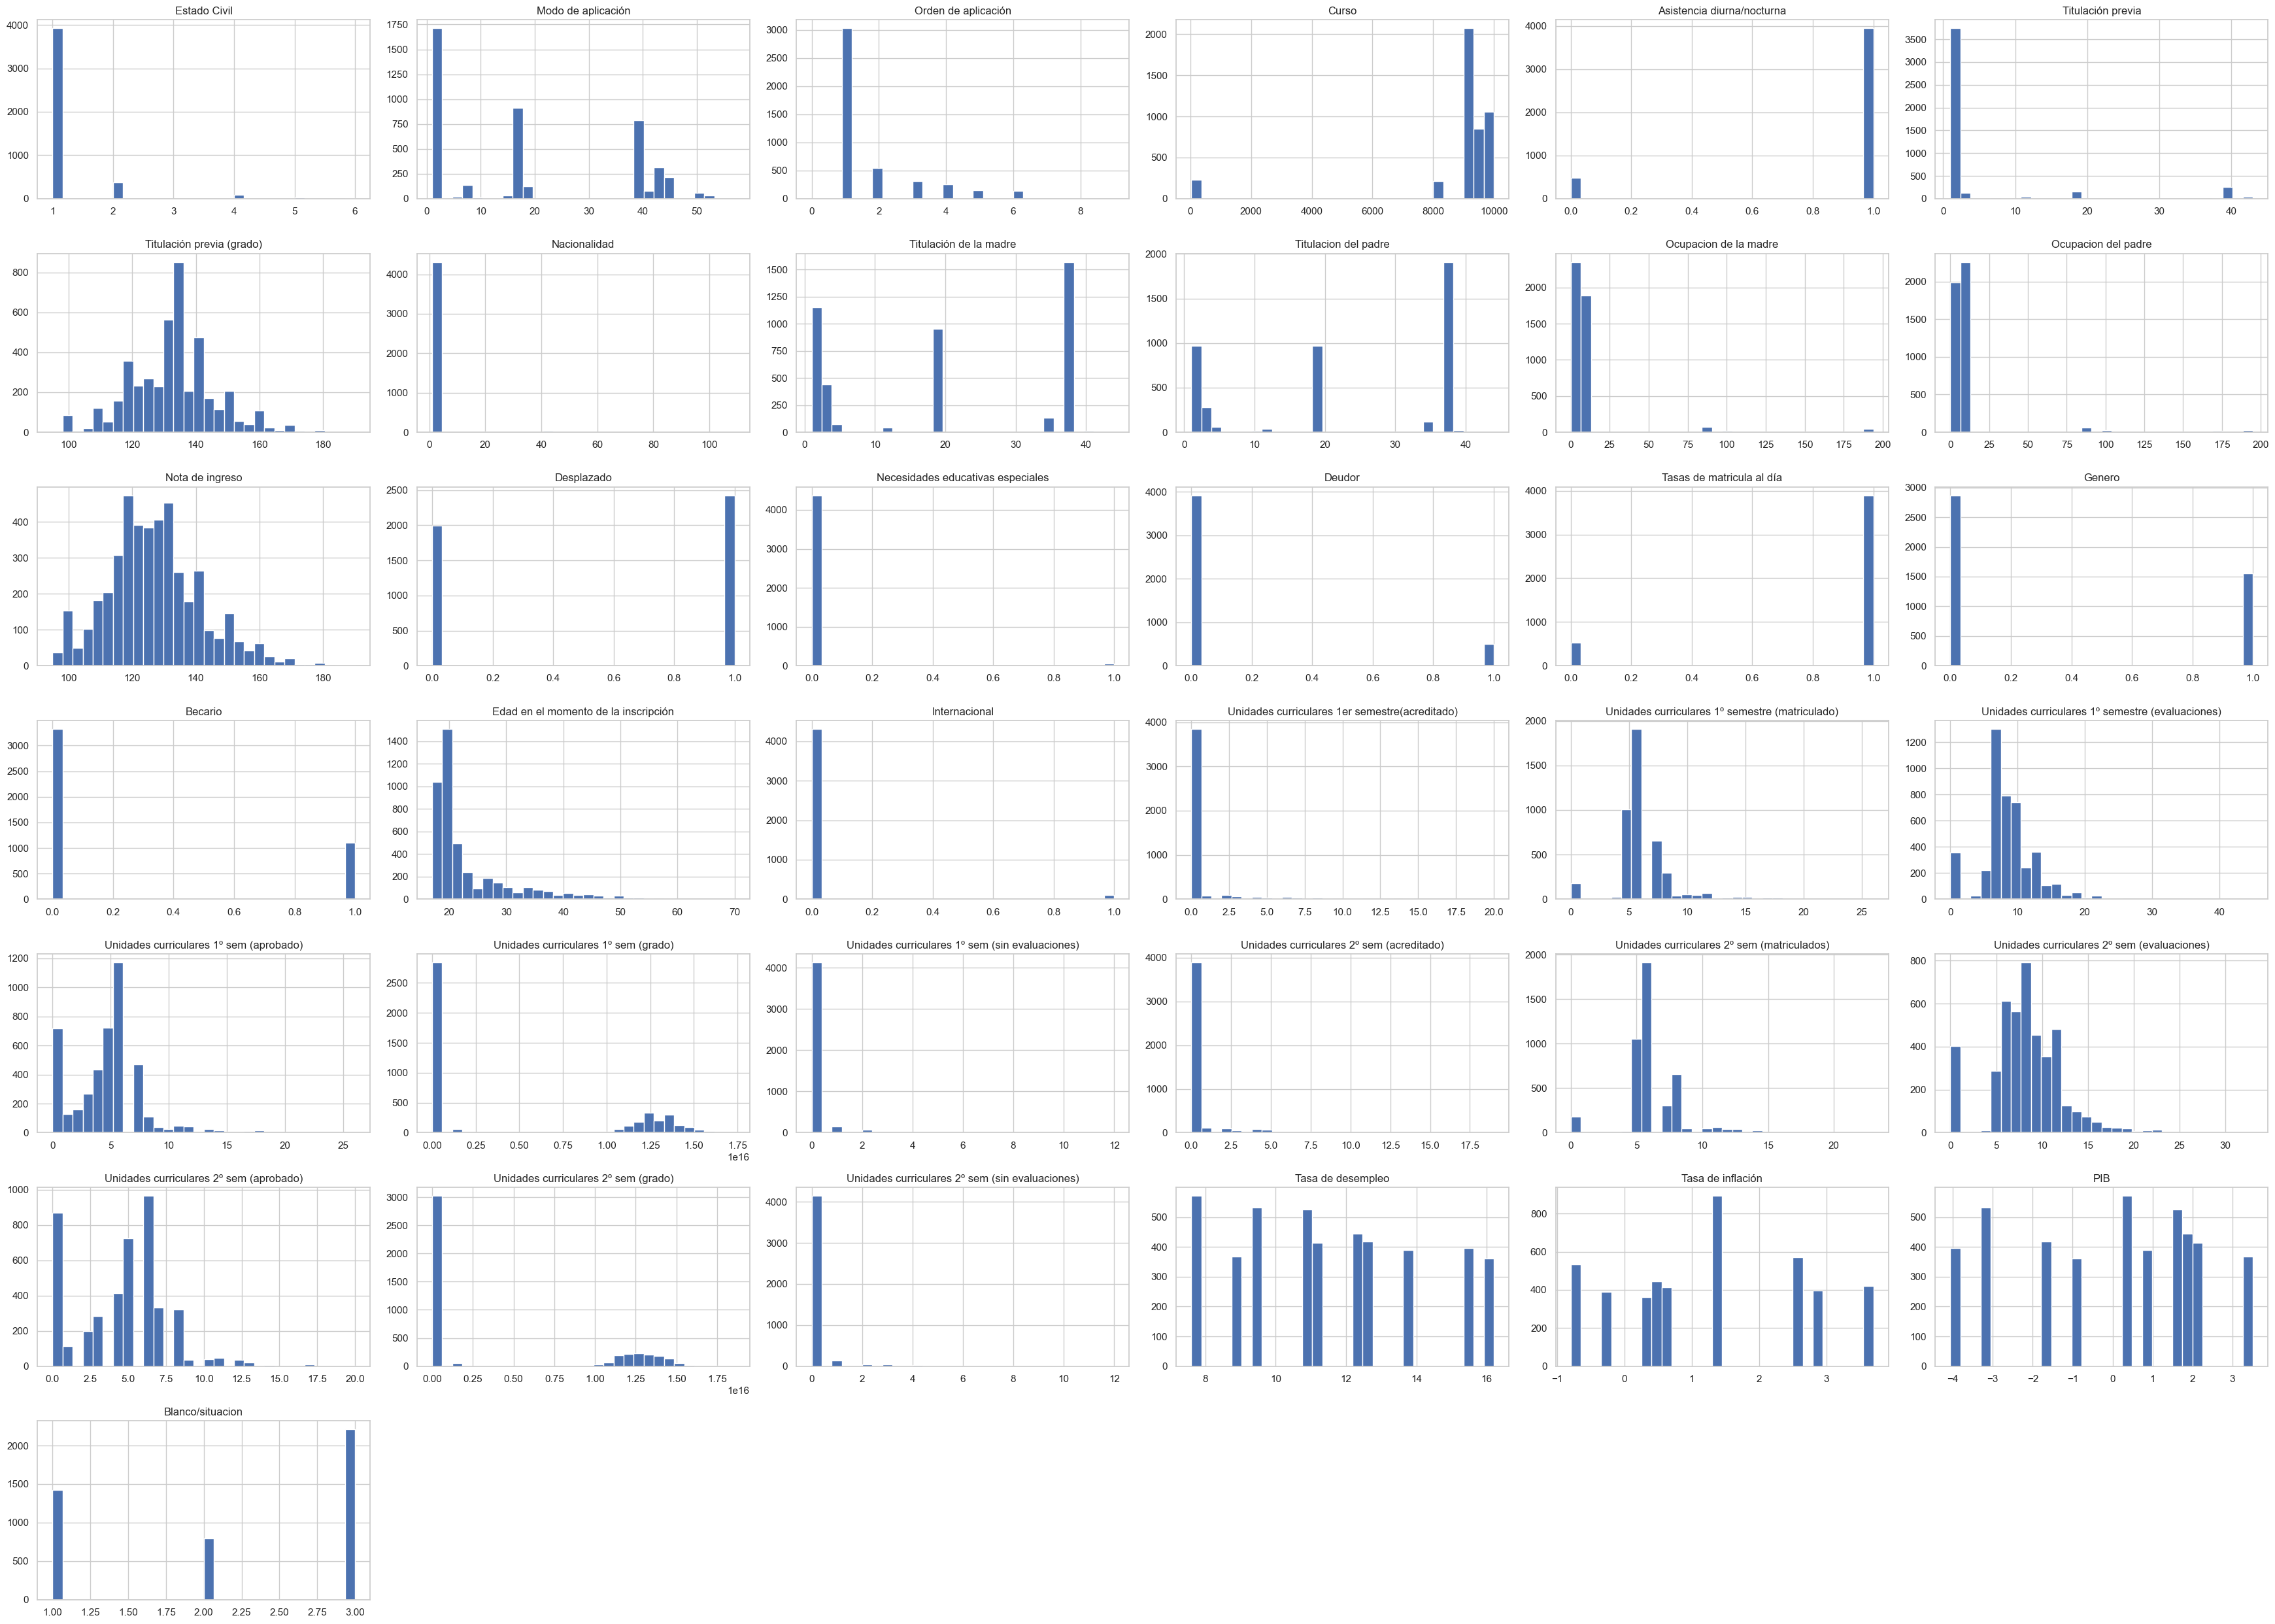

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de variables numéricas
data.hist(bins=30, figsize=(35, 25))
plt.tight_layout()
plt.show()

Ingenería de variables:

In [320]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Aplicar SMOTE o alguna otra técnica de remuestreo
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Identificar columnas categóricas en X_resampled
categorical_cols = X_resampled.select_dtypes(include=['object']).columns

# Aplicar codificación a X_resampled
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_resampled[col] = le.fit_transform(X_resampled[col])
    label_encoders[col] = le


AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

Escalado de datos

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)


Selección y evaluación de modelos

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.3, random_state=42)

# Probar diferentes modelos
models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Resultados para {name}:")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Resultados para RandomForest:
              precision    recall  f1-score   support

           1       0.89      0.79      0.84       681
           2       0.79      0.80      0.80       650
           3       0.78      0.87      0.82       658

    accuracy                           0.82      1989
   macro avg       0.82      0.82      0.82      1989
weighted avg       0.82      0.82      0.82      1989

[[537  67  77]
 [ 47 520  83]
 [ 17  68 573]]


Resultados para LogisticRegression:
              precision    recall  f1-score   support

           1       0.81      0.75      0.78       681
           2       0.68      0.65      0.66       650
           3       0.74      0.82      0.78       658

    accuracy                           0.74      1989
   macro avg       0.74      0.74      0.74      1989
weighted avg       0.74      0.74      0.74      1989

[[510 110  61]
 [100 424 126]
 [ 22  94 542]]


Resultados para SVM:
              precision    recall  f1-score   support



Interpretación del Modelo

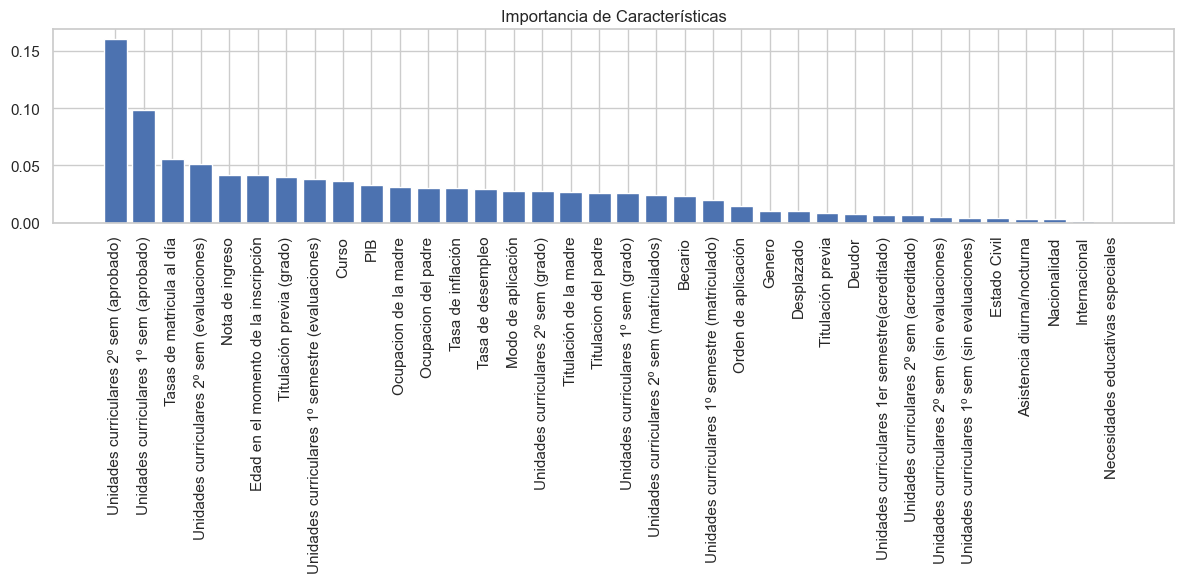

In [ ]:
importances = models["RandomForest"].feature_importances_
indices = np.argsort(importances)[::-1]

# Visualización de la importancia de características
plt.figure(figsize=(12, 6))
plt.title("Importancia de Características")
plt.bar(range(X_resampled_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_resampled_scaled.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

interpretabilidad con SHAP:

In [ ]:
!pip install shap


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   ------------------------------------- - 440.3/456.2 kB 13.9 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 9.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.4 kB ? eta -:--:--
   ---------------------------------------- 78.4/78.4 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------- ---------------- 1.6/2.7 MB 34.0 MB/s eta 0:00:01
   ---------------------------------------  2.7/2.7 MB 43.4 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 34.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   --- ---------------------


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


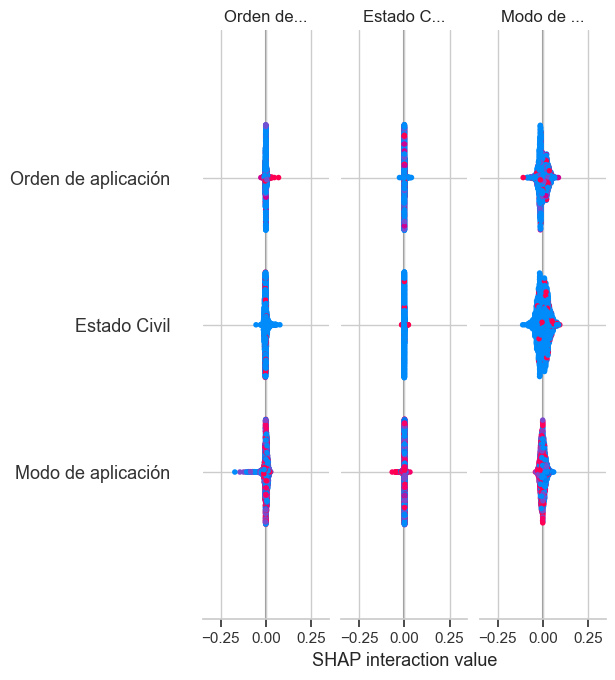

In [ ]:
import shap

explainer = shap.TreeExplainer(models["RandomForest"])
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
